In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color='red' size='6'>ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스에 포함
    * seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font',family='Malgun Gothic') # windows
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지
# warning(경고) 안보이게


# 2절 seaborn
- [공식사이트](https://seaborn.pydata.org/)
- [seaborn API](https://seaborn.pydata.org/api.html)

- seaborn으로 그래프 그리기 위해 다음 단계를 따릅니다
    1. 데이터 준비
    2. 미적 속성 설정 (한글설정을 다시)
    3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍관계, 밀도 ,회귀, 다중 그래프)
    4. 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [7]:
iris = sns.load_dataset('iris')

In [9]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
iris['species'].value_counts() # 범주별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2.2 미적속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 style 설정


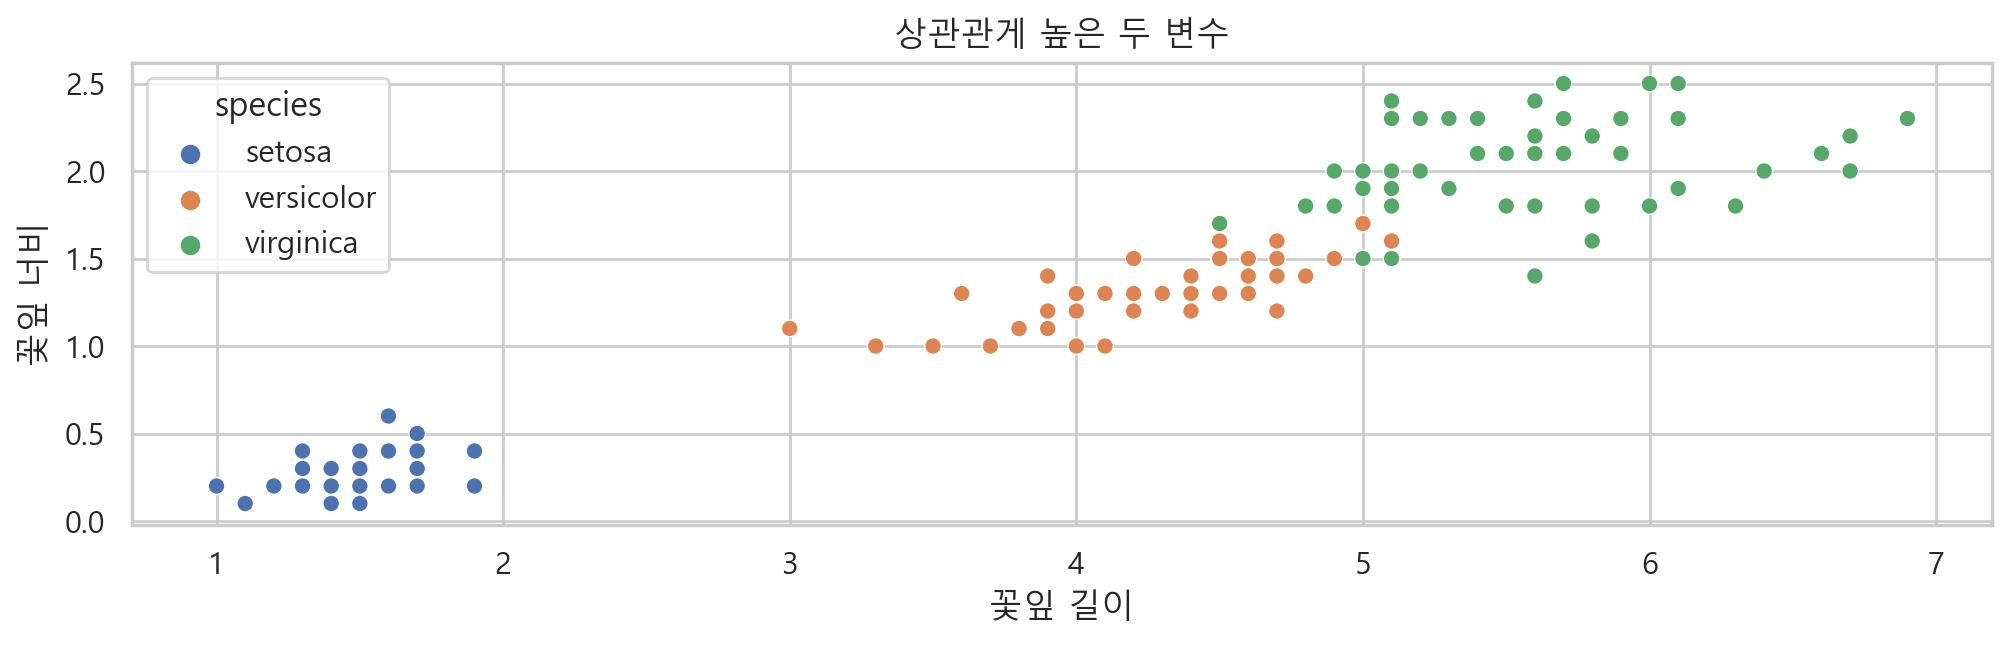

In [39]:
plt.figure(figsize=(12,3))
sns.set(style='whitegrid')
plt.rc('font',family='Malgun Gothic') # windows
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title = '상관관게 높은 두 변수', ylabel='꽃잎 너비', xlabel='꽃잎 길이')
sns.move_legend(ax, 'upper left')
plt.show()

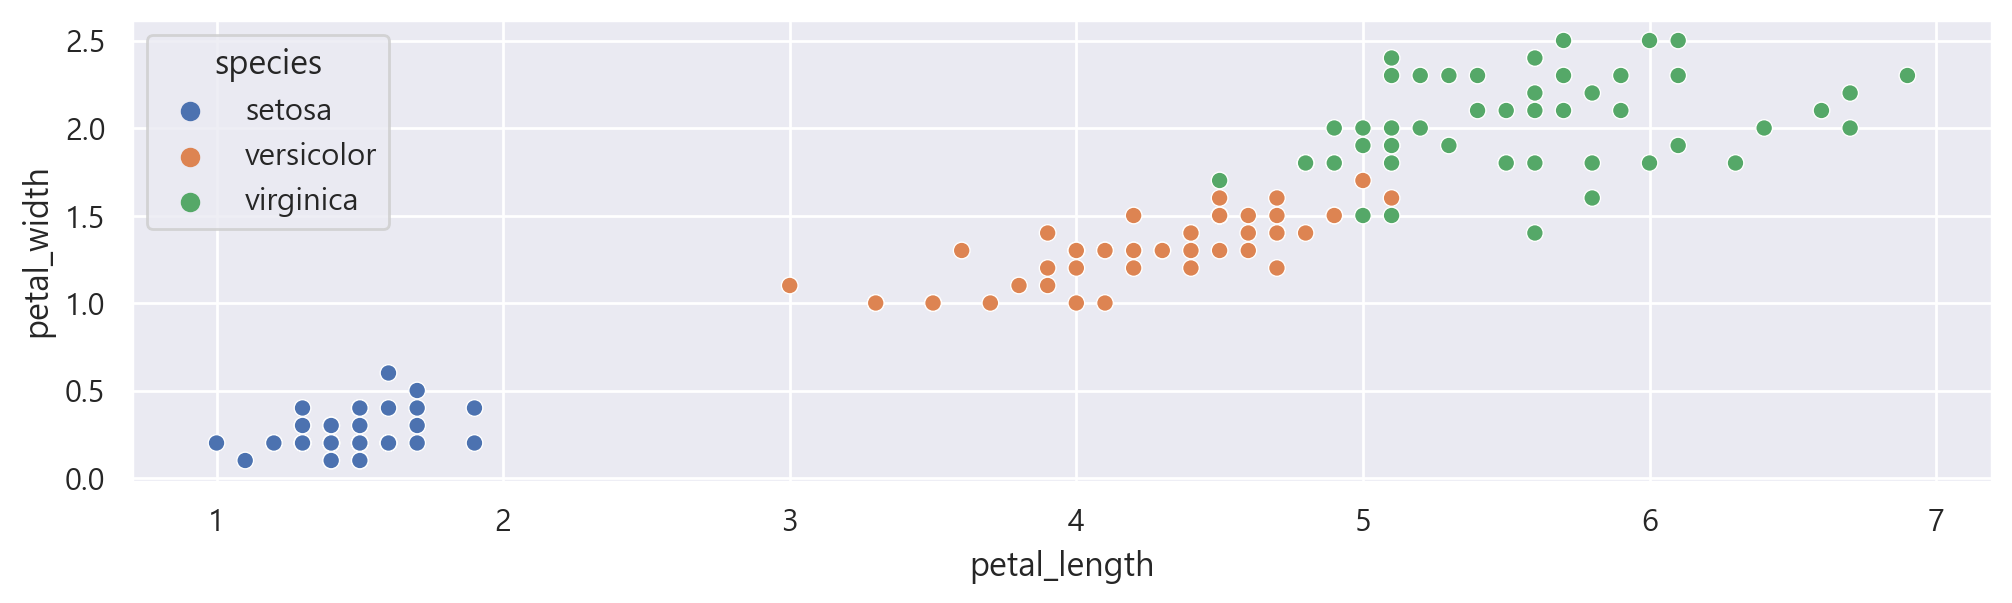

In [73]:
plt.figure(figsize=(12,3))
sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
plt.rc('font',family='Malgun Gothic') # windows
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

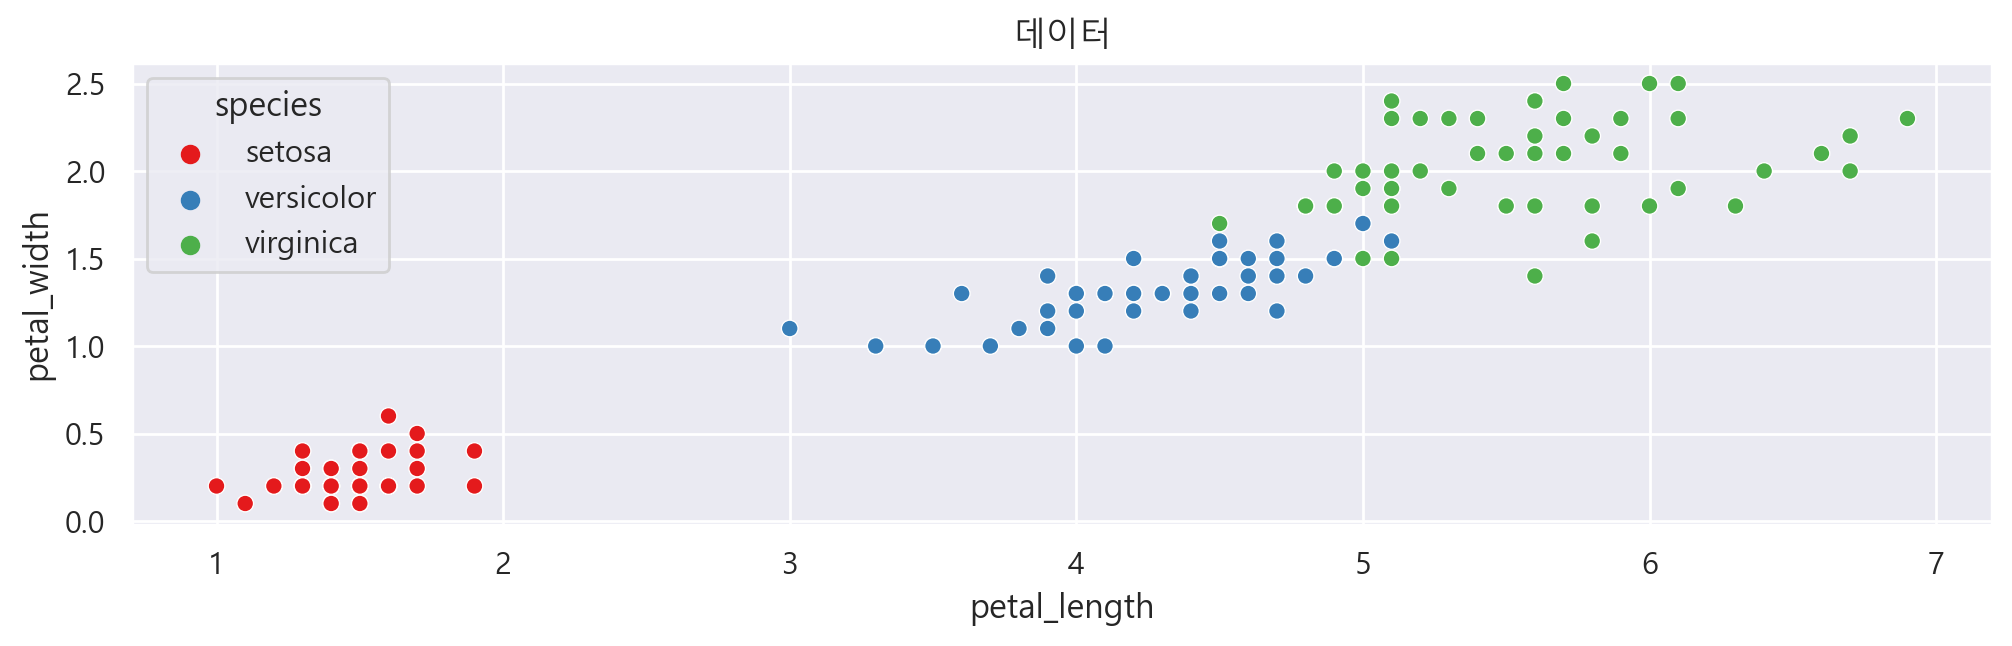

In [77]:
plt.figure(figsize=(12,3))
sns.set_palette('Set1',3)
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set_title('데이터')
plt.show()

## 2.3 seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
   - x축이 수치형 데이터
   
 (ex) scatterplot, lineplot => replot(서브플롯)

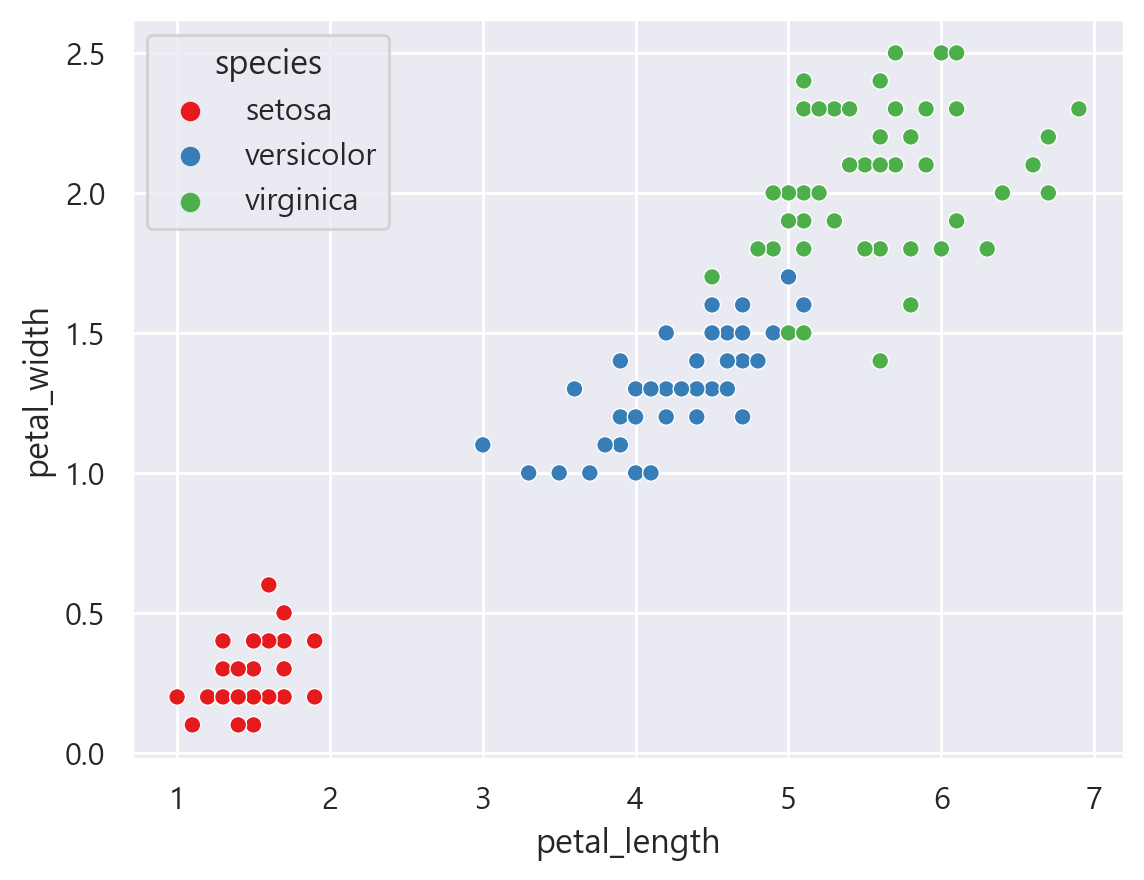

In [83]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', palette='Set1', hue='species')
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

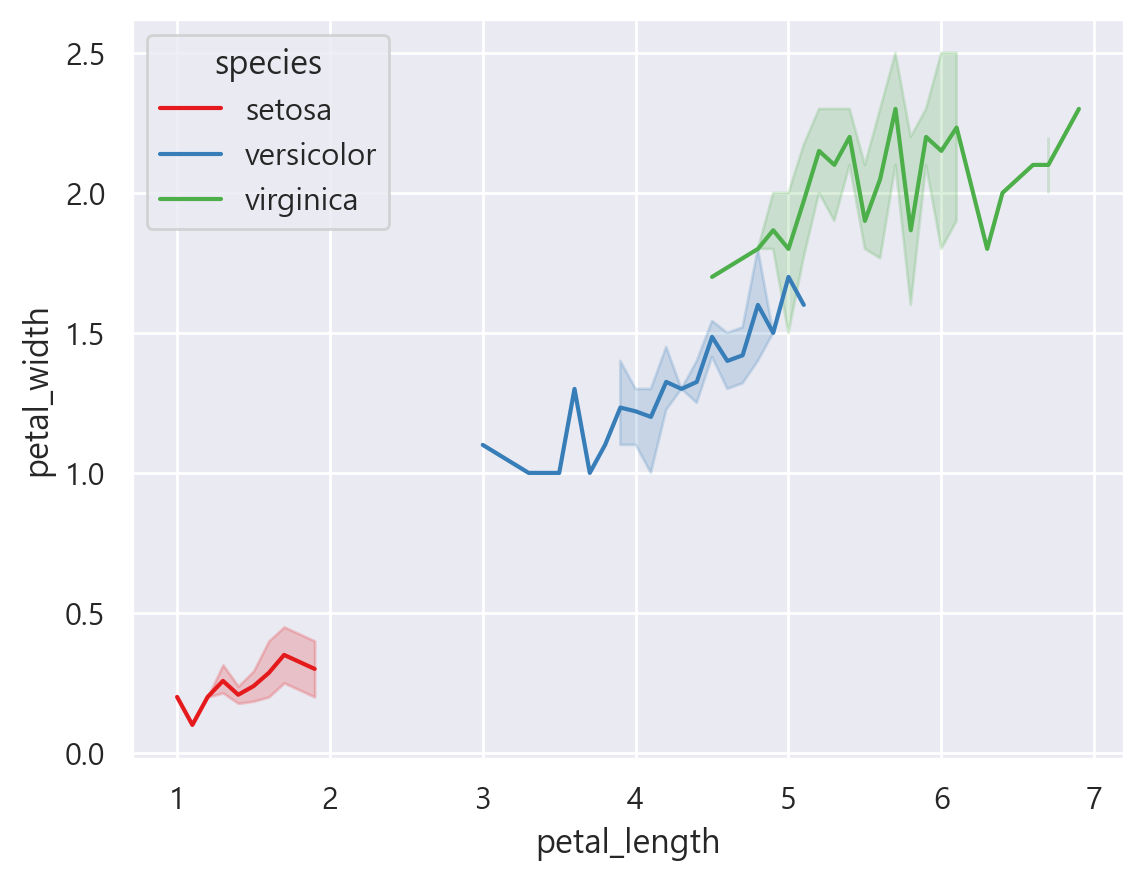

In [87]:
# lineplot의 음영 : 95% 신뢰구간
sns.lineplot(data=iris, x='petal_length',y='petal_width', hue='species')

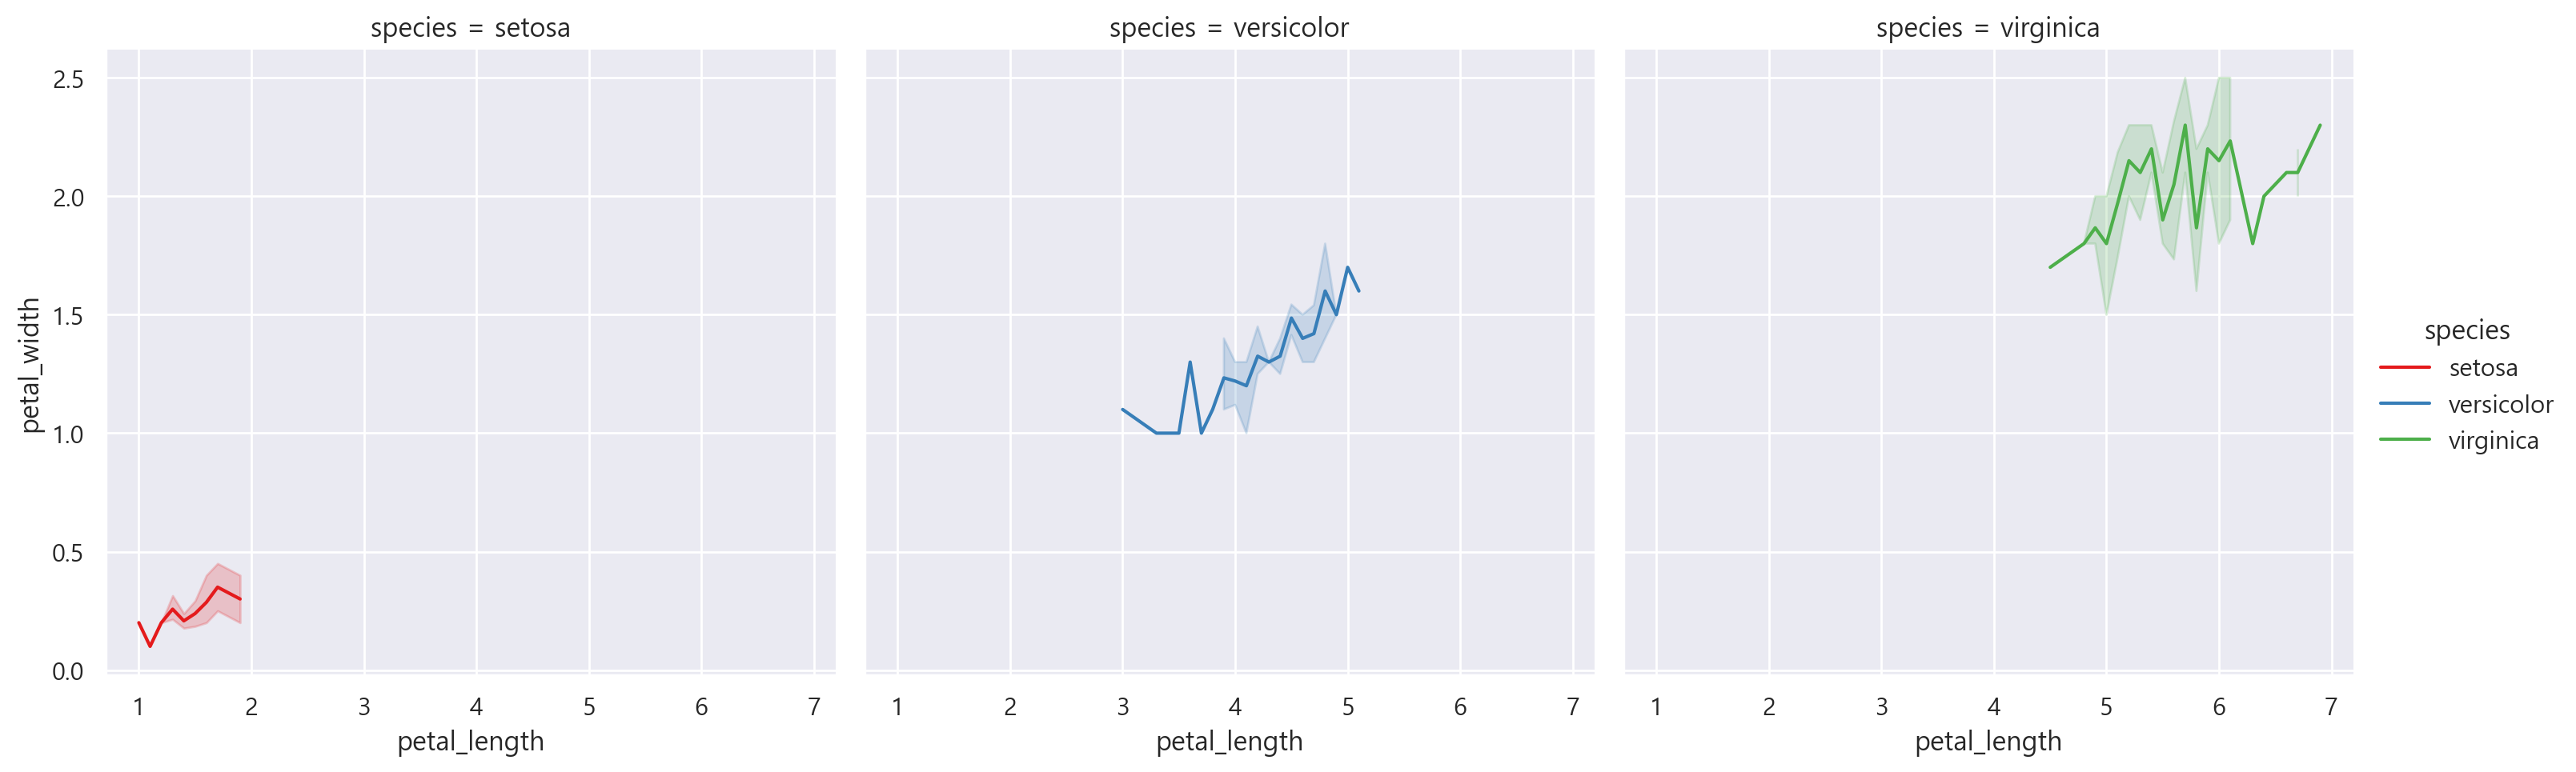

In [93]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length',y='petal_width',
            hue='species',
            kind='line', # defualt : 'scatter'
            col='species',
            col_wrap=3   # 한줄에 표현될 서브플롯 수
           )
plt.show()

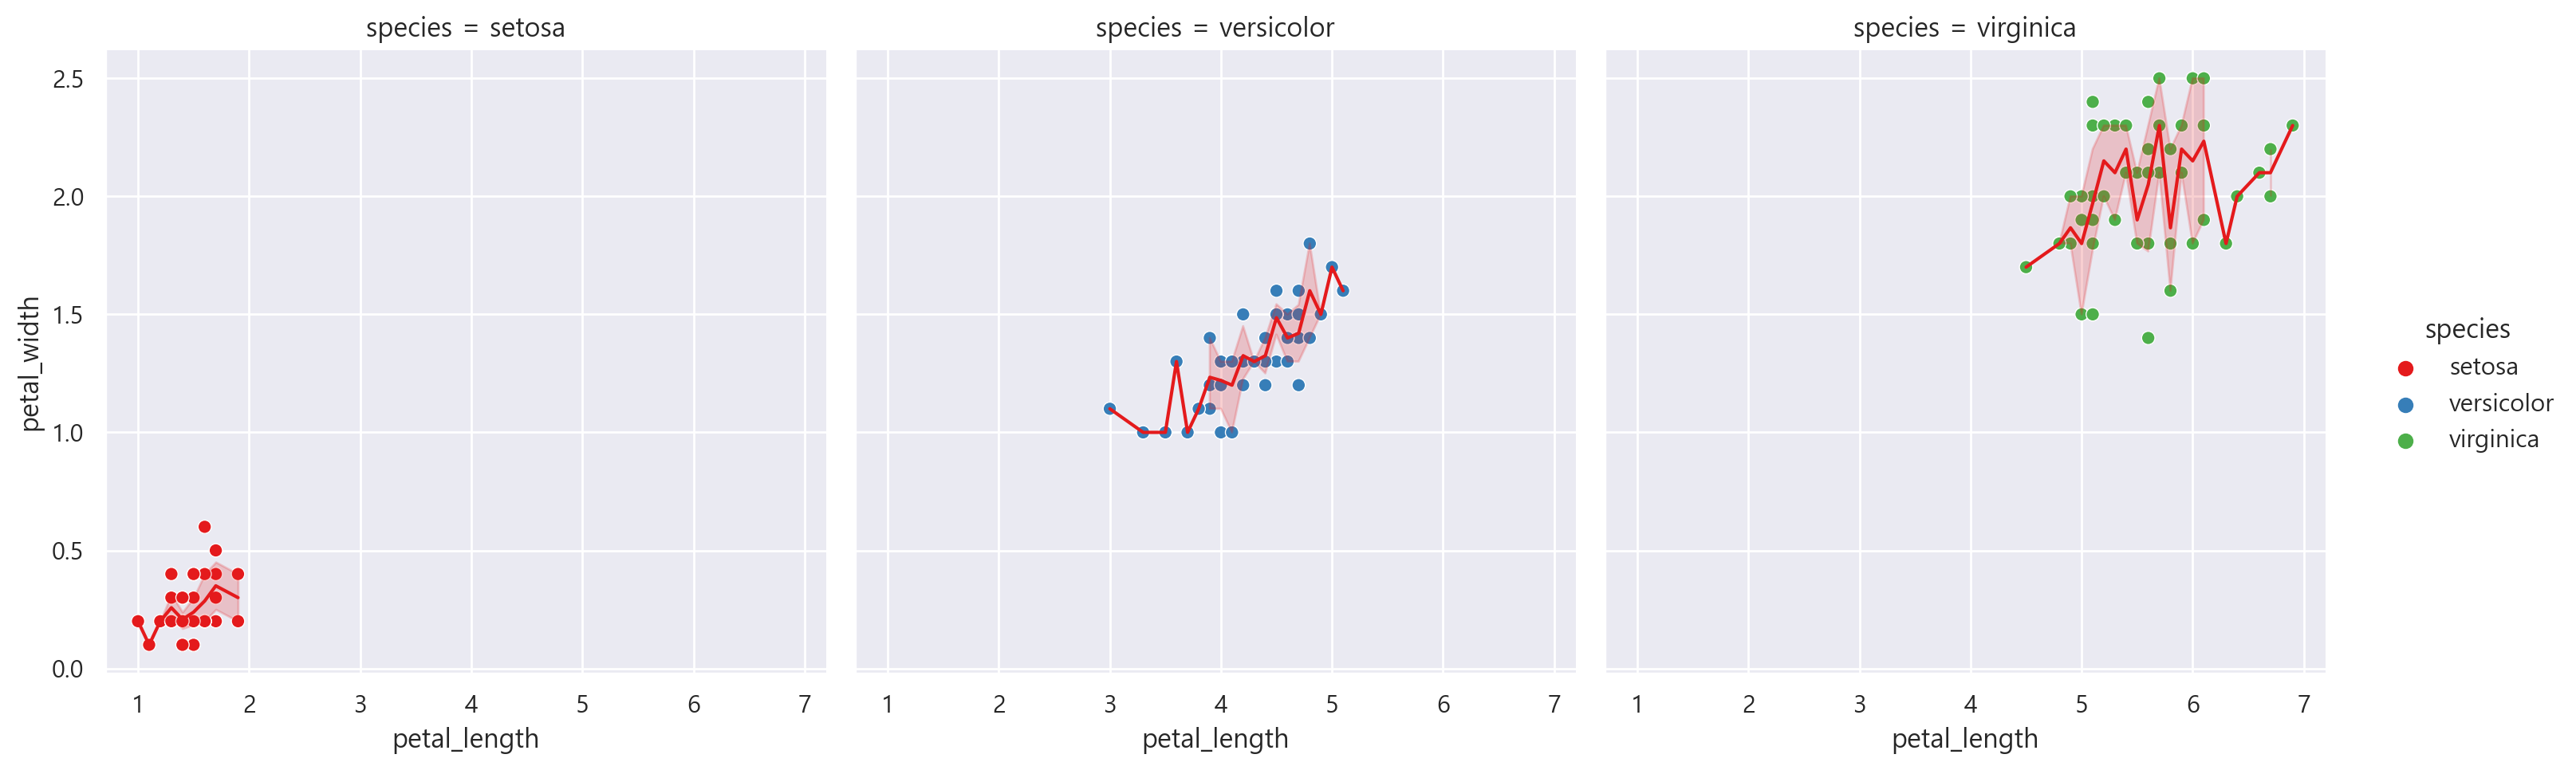

In [96]:
# line과 scatter를 종별 서브플롯으로 겹쳐서
g= sns.relplot(data=iris, x='petal_length',y='petal_width',hue='species',col='species')
g.map_dataframe(sns.lineplot, x='petal_length',y='petal_width')
plt.show()

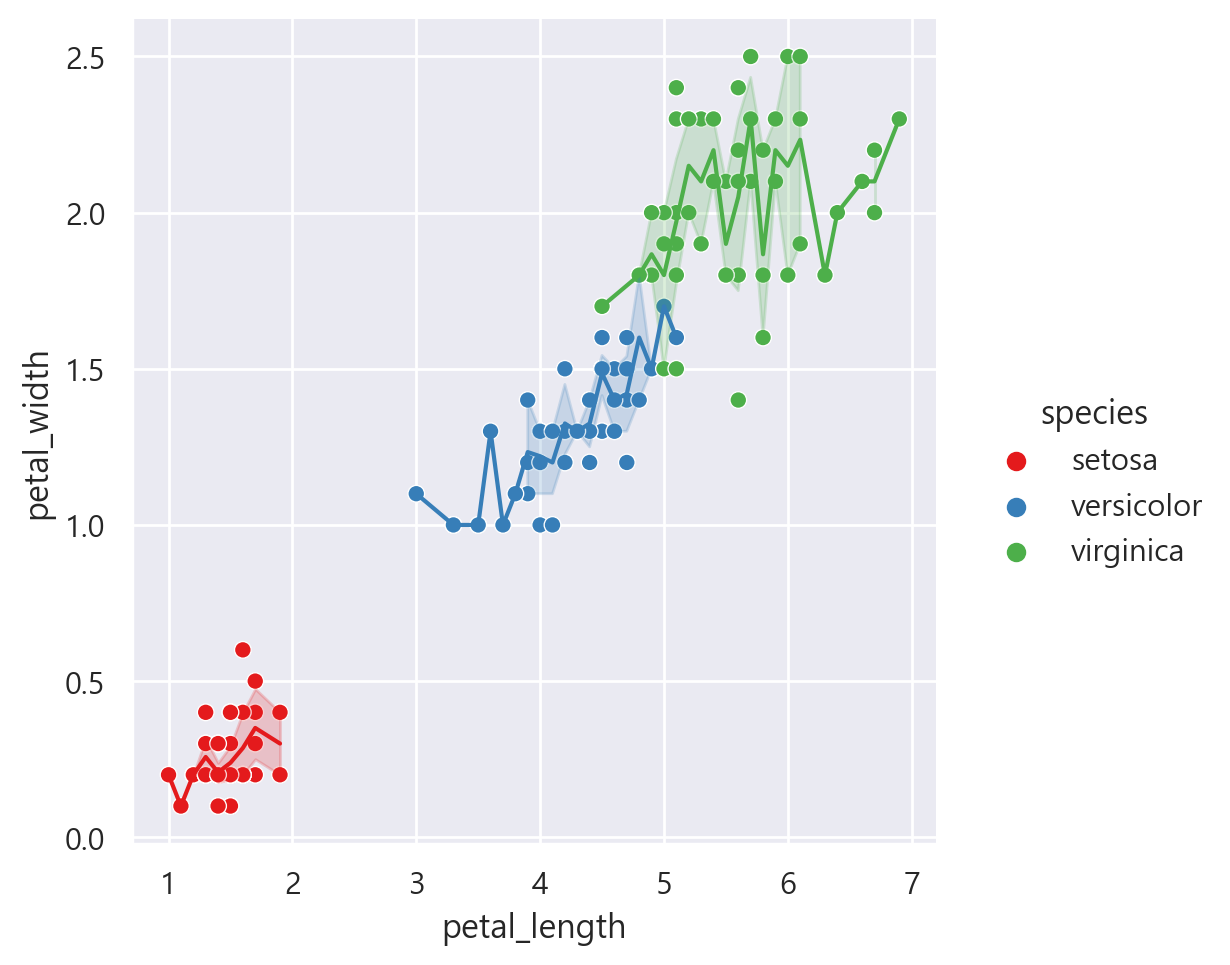

In [98]:
# line과 scatter를 종별 서브플롯으로 겹쳐서
g= sns.relplot(data=iris, x='petal_length',y='petal_width',hue='species')
g.map_dataframe(sns.lineplot, x='petal_length',y='petal_width', hue='species')
plt.show()

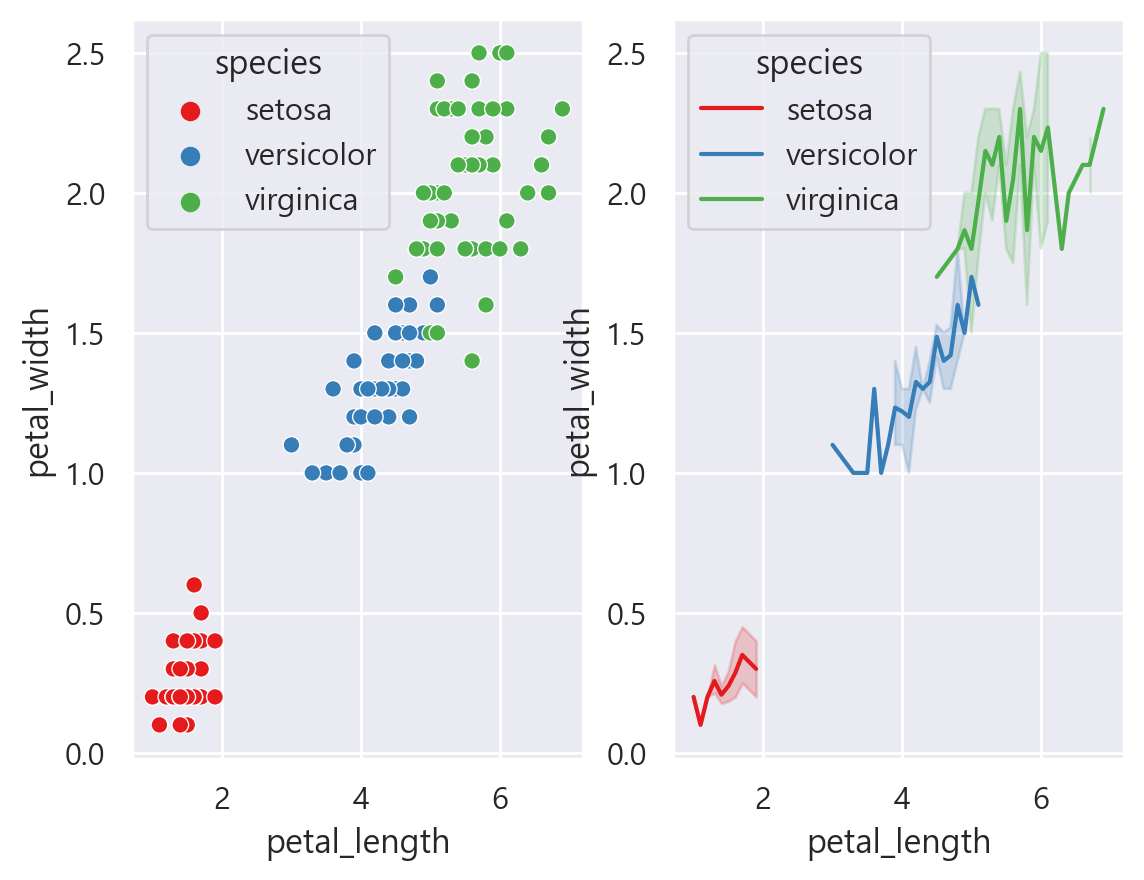

In [109]:
# ax[0] 에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris,x='petal_length',y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length',y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
   - x축이 범주형 데이터
   
       (ex) stripplot(무작위로 흩뿌림), swarmplot(겹치지않는산점도)
        
        barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
        
        countplot(count는 x의 빈도수가 높이)
        
        boxplot, violinplot, boxenplot
        
        => catplot(서브플롯)

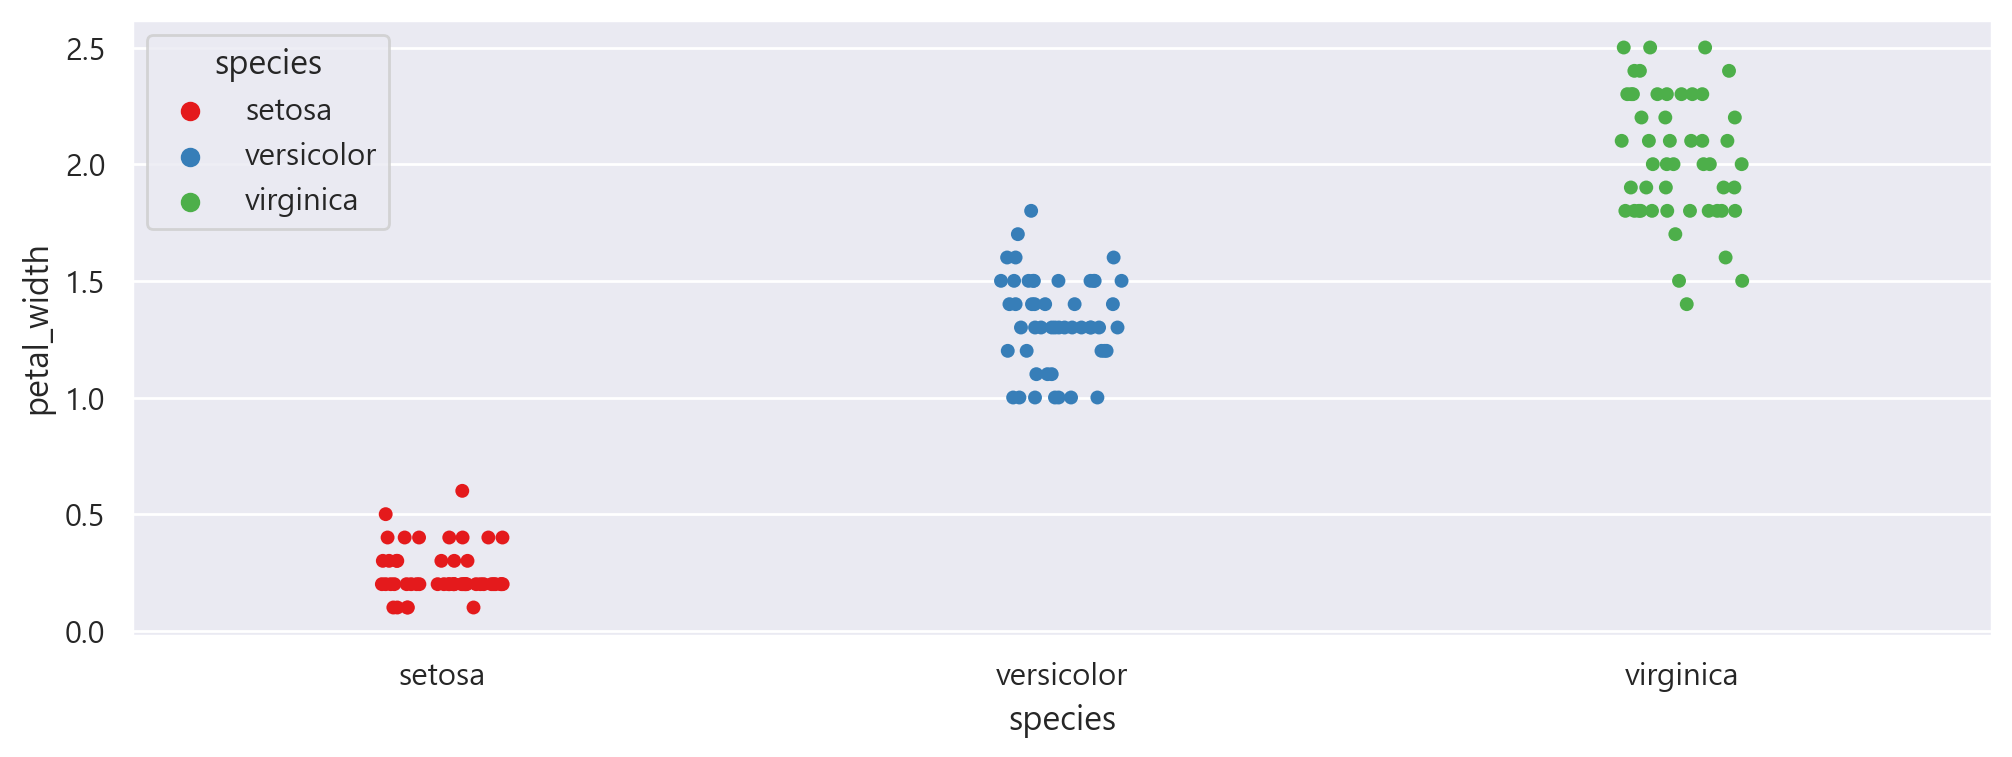

In [115]:
# x축이 범주형일 때의 산점도
plt.figure(figsize=(12,4))
ax = sns.stripplot(data=iris, x='species', y='petal_width', hue='species')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


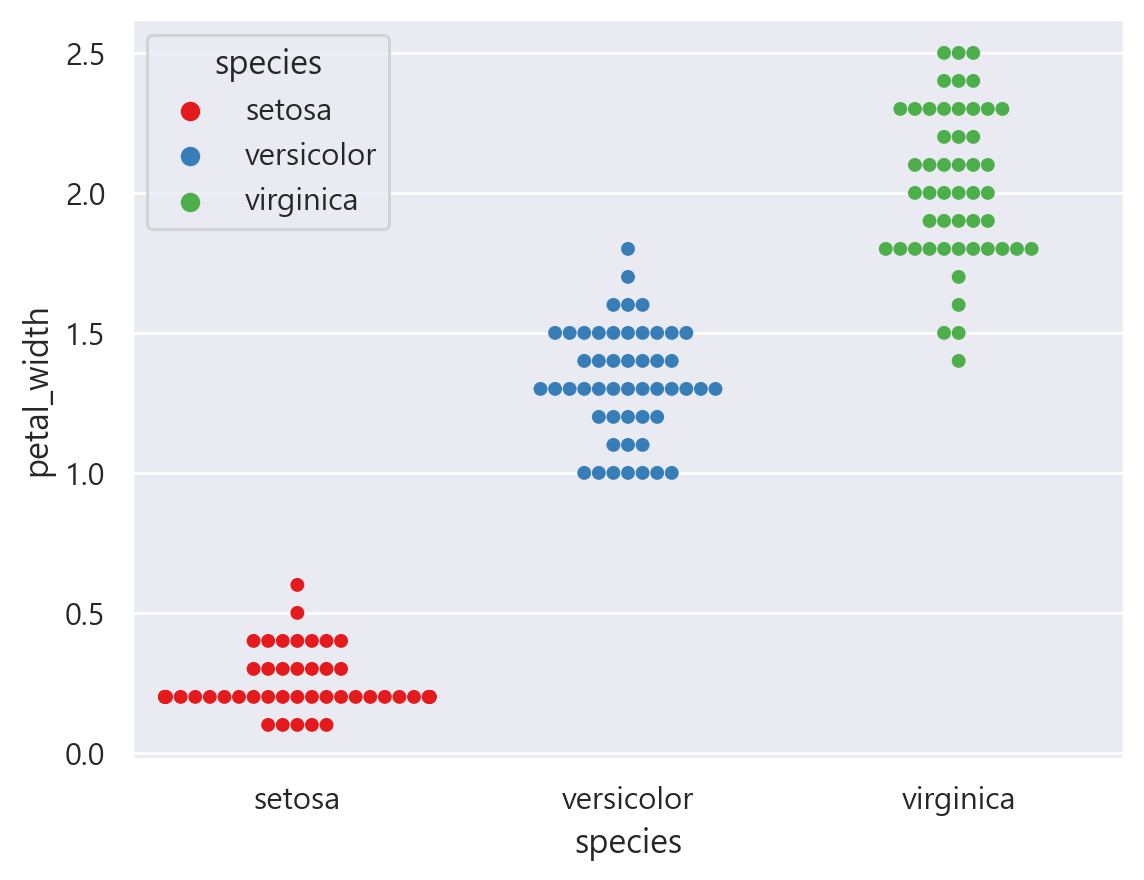

In [117]:
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


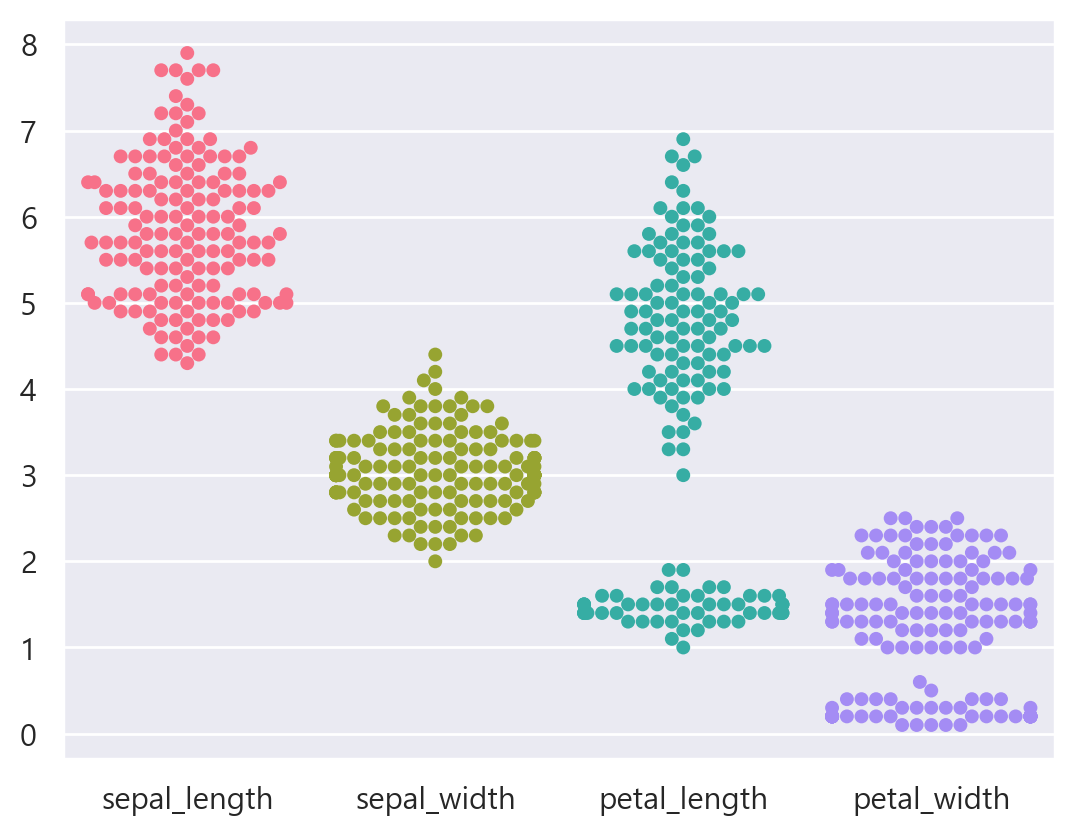

In [120]:
# 범주형 그래프의 x축을 지정하지 않으면
sns.swarmplot(data=iris)

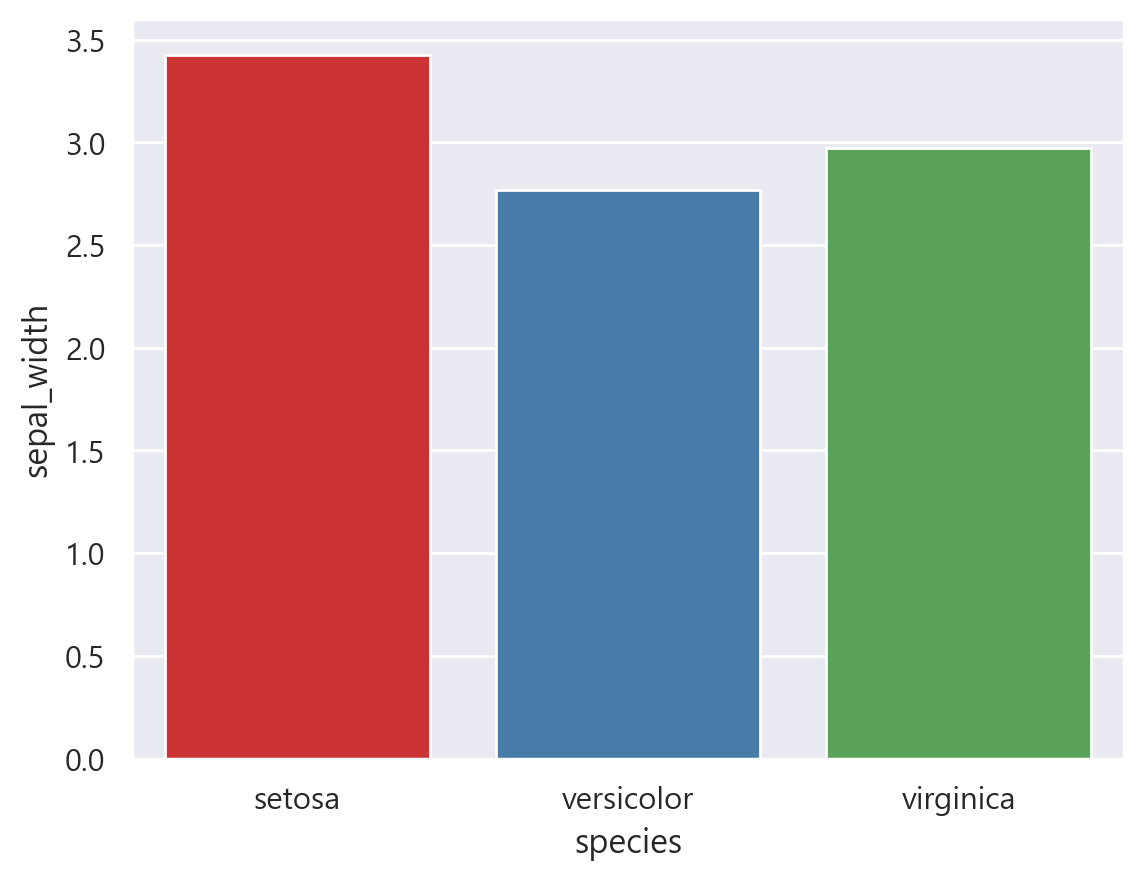

In [122]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 
sns.barplot(data=iris, x='species', y='sepal_width', errorbar=None) # errorbar=None : 신뢰구간 제외
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

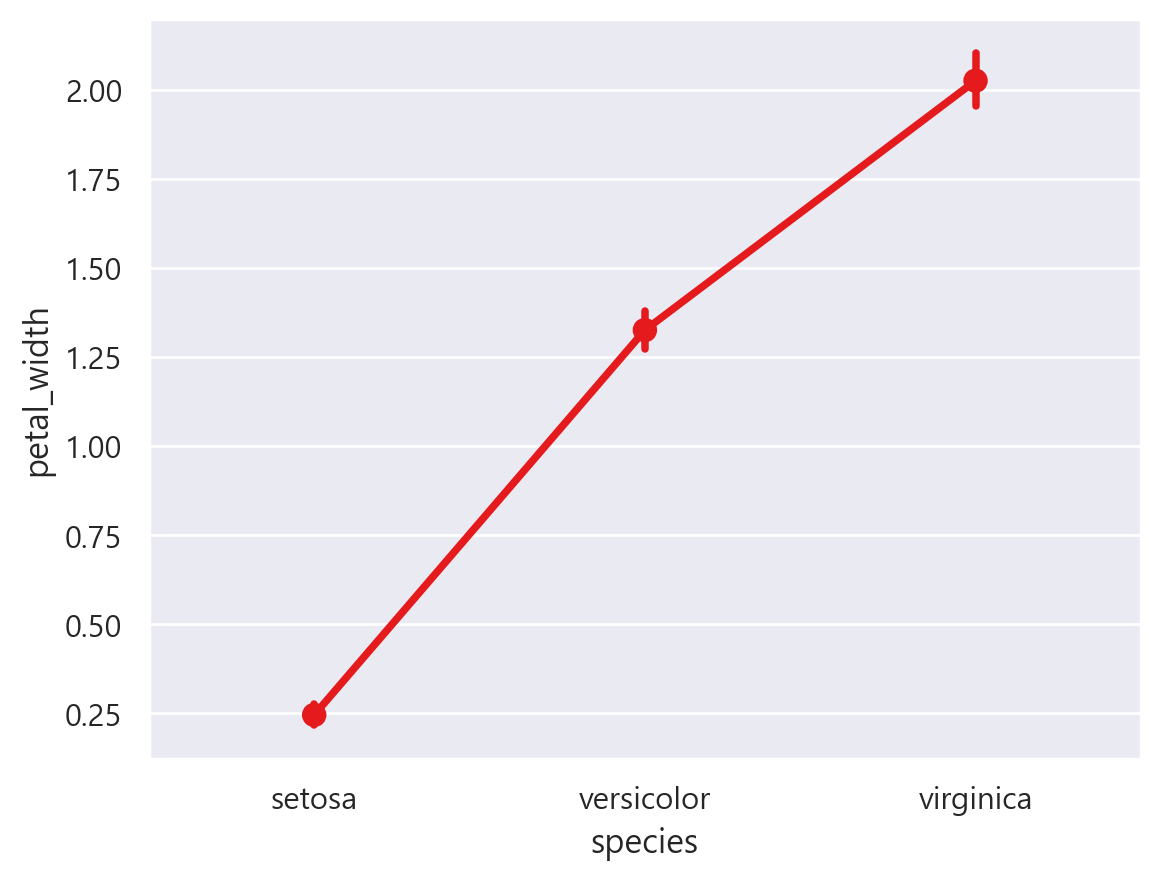

In [123]:
sns.pointplot(data=iris, x='species', y='petal_width')

In [125]:
# 성별 생존율을 막대그래프
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='survived'>

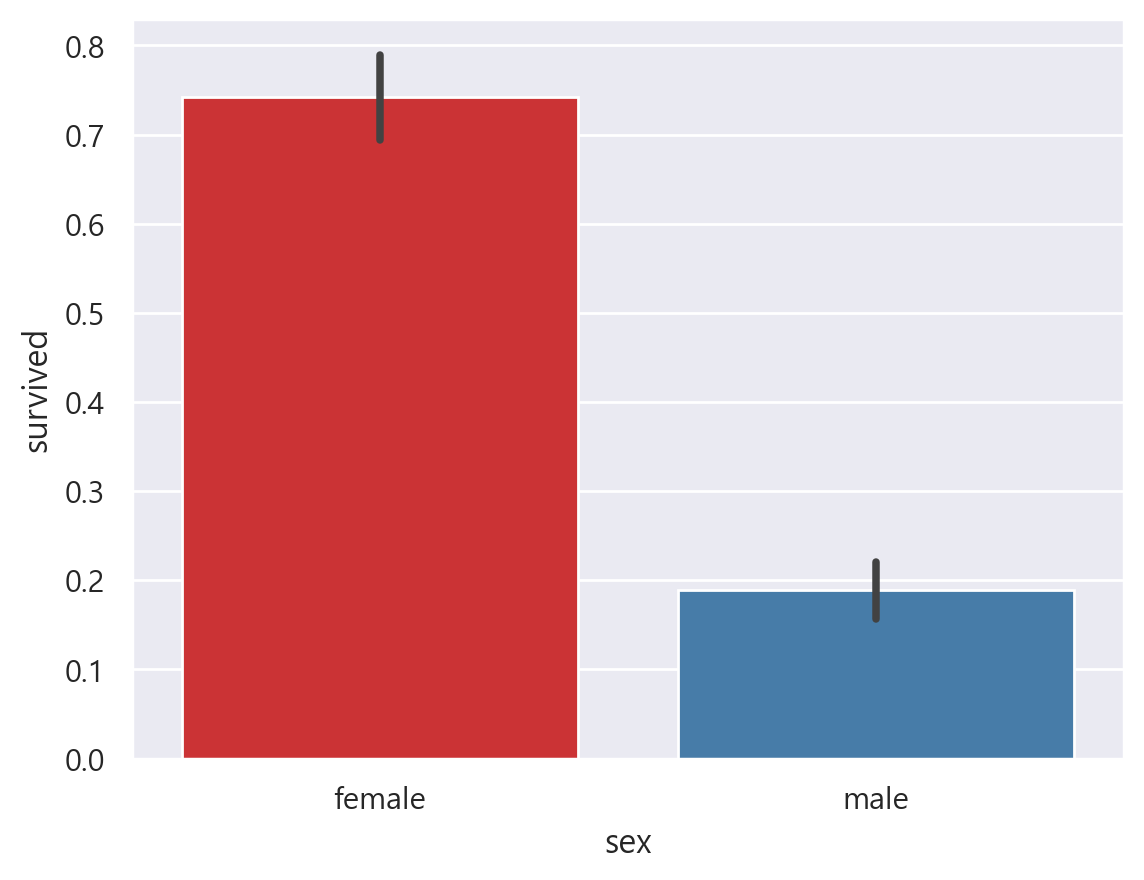

In [139]:
sns.barplot(data=titanic, x='sex', y='survived', order=['female','male'])

In [142]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [151]:
len(titanic[(titanic.sex=='male') & (titanic.survived==0)]) # 남자 사망자

468

In [154]:
len(titanic[(titanic.sex=='male') & (titanic.survived==1)]) # 남자 생존자

109

In [155]:
len(titanic[(titanic.sex=='female') & (titanic.survived==0)]) # 여자 사망자

81

In [157]:
len(titanic[(titanic.sex=='female') & (titanic.survived==1)]) # 여자 생존자

233

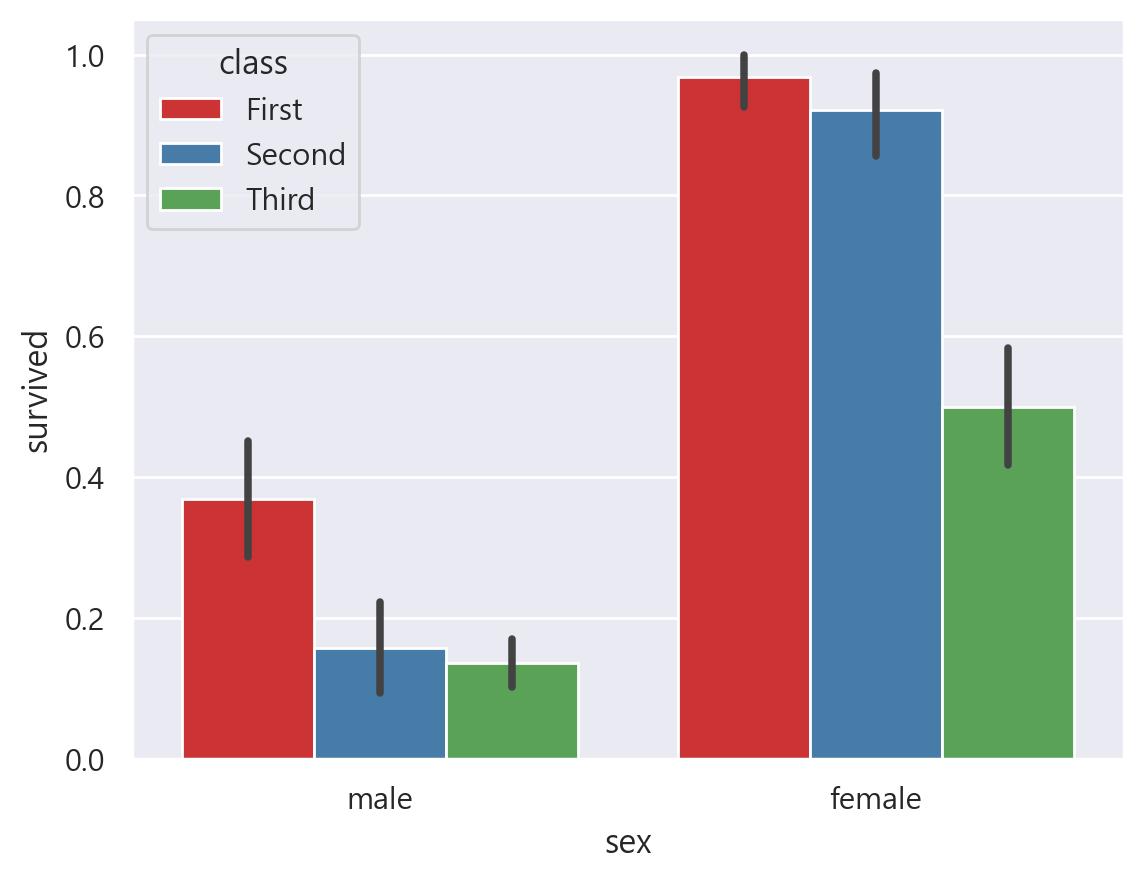

In [158]:
# class별 생존율 hue='sex'
sns.barplot(data=titanic, x='sex',y='survived', hue='class')
plt.show()

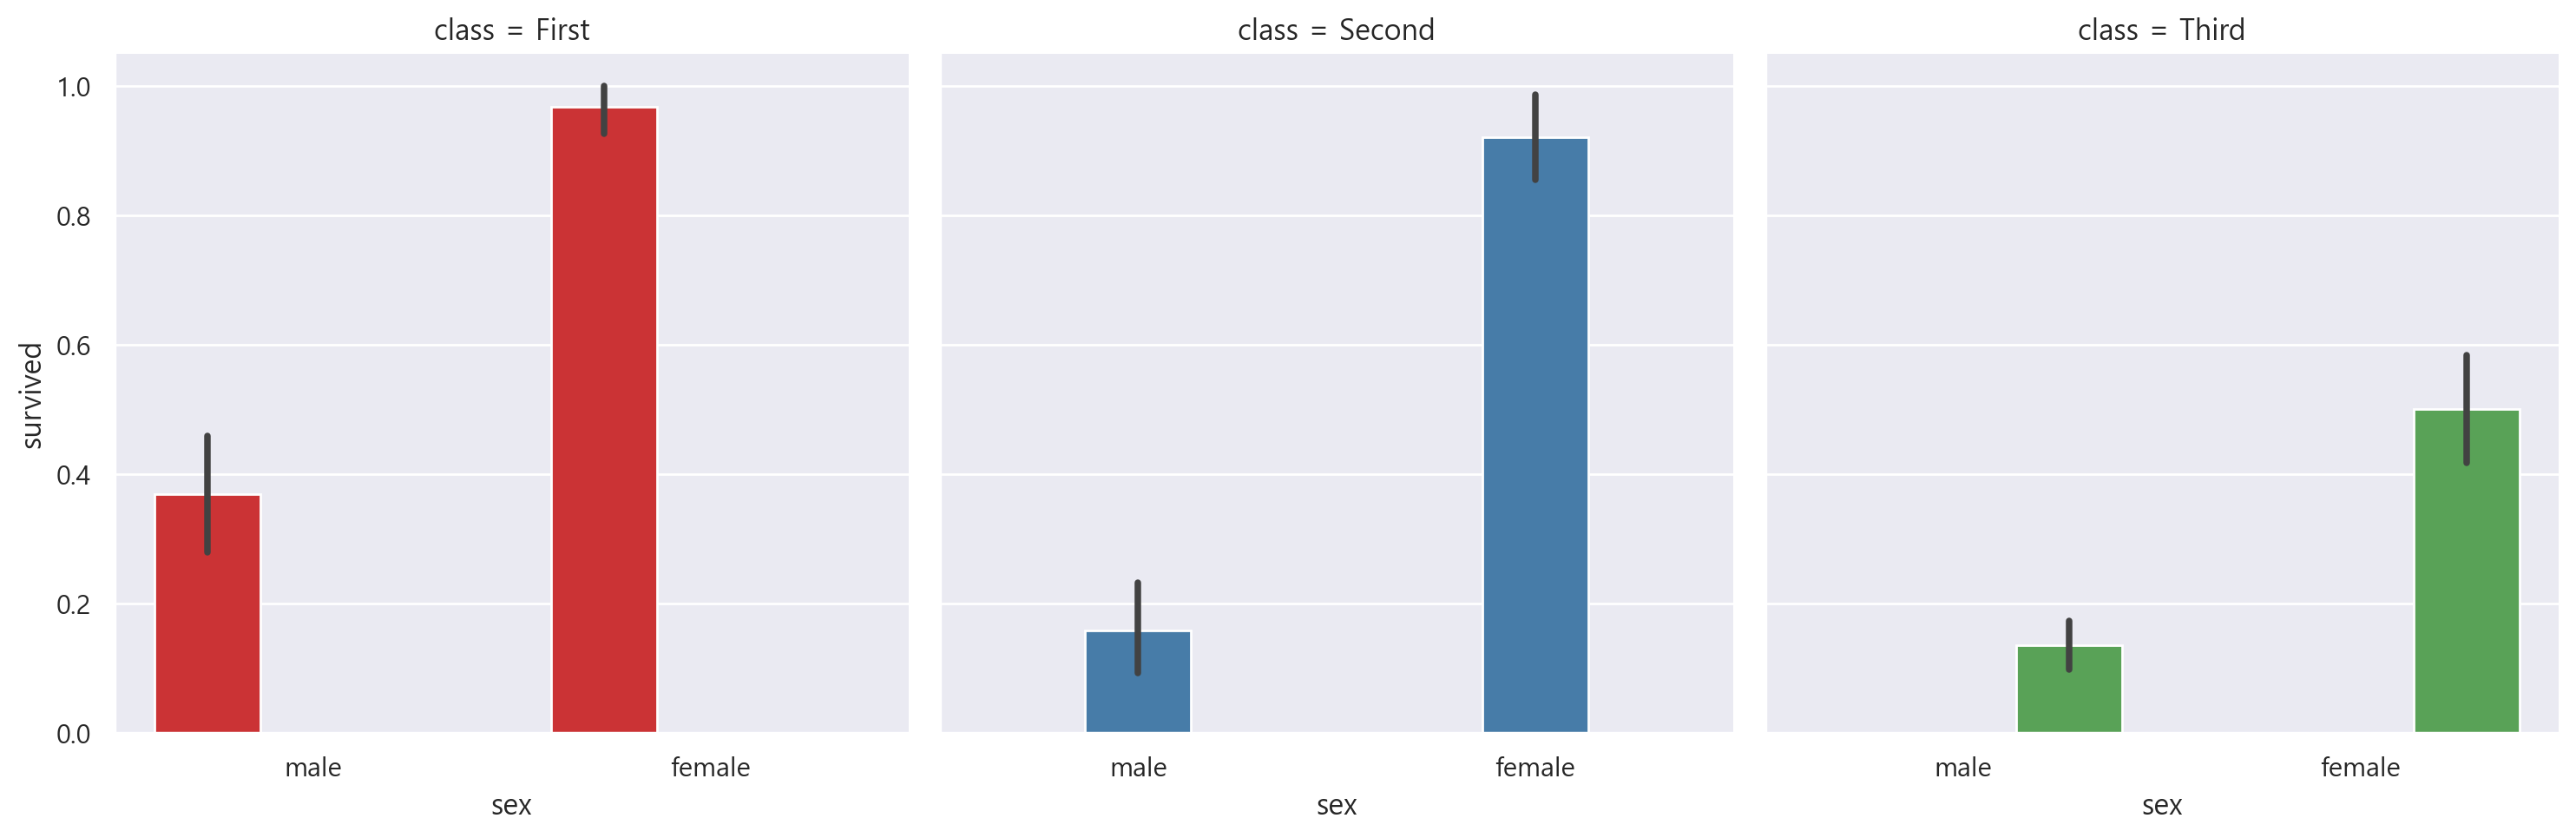

In [163]:
# class별로 성별생존률을 서브플롯(막대그래프)
sns.catplot(data=titanic, 
            x='sex',
            y='survived',
            hue='class', 
            kind='bar', # 기본값은 stripplot
            col='class'
           )

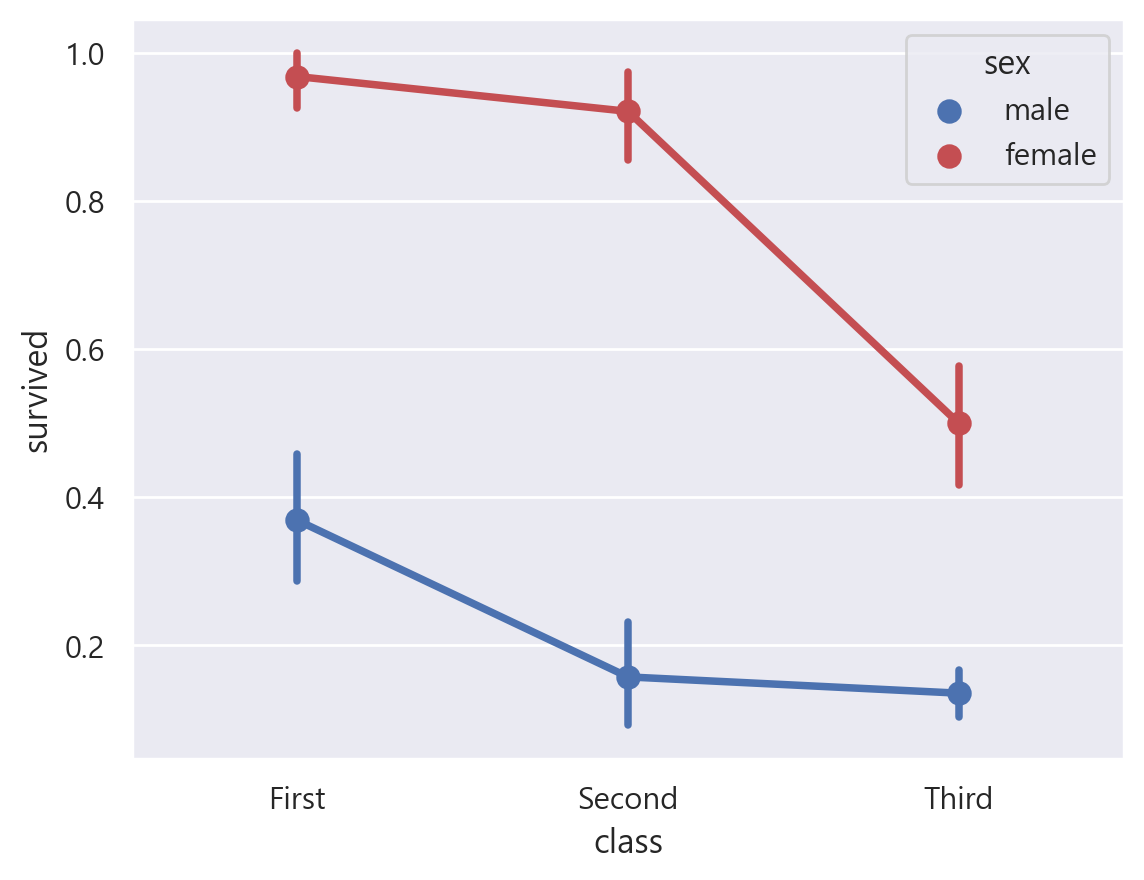

In [167]:
# 성별 생존율 hue='class'
sns.pointplot(data=titanic,
              x='class',
              y='survived',
              hue='sex',
              palette={'male':'b','female':'r'})
plt.show()

In [172]:
print('deck 전체 데이터 갯수:{}, 결측치 갯수 : {}'.format(len(titanic),titanic.deck.isna().sum()))

deck 전체 데이터 갯수:891, 결측치 갯수 : 688


<Axes: xlabel='deck', ylabel='count'>

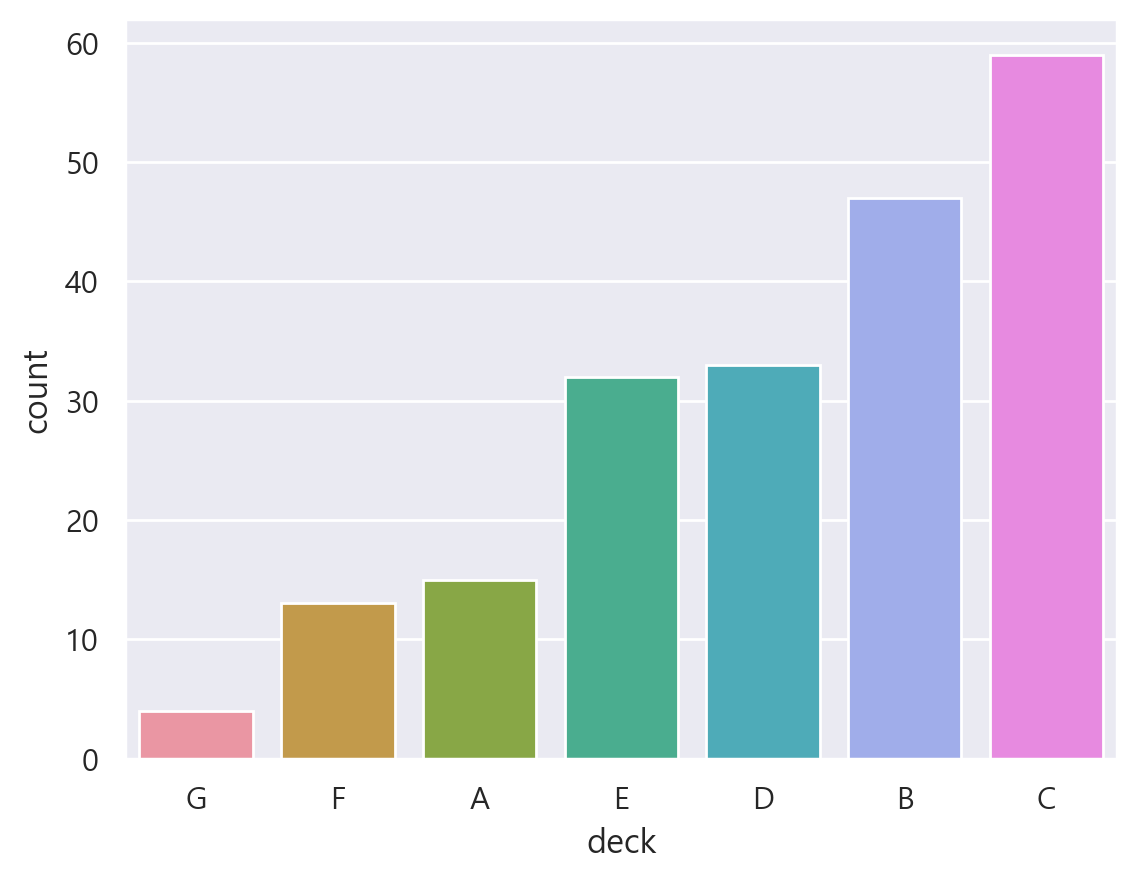

In [211]:
# deck별 갯수 막대그래프(countplot)
sns.countplot(data=titanic,
              x='deck',
              order=titanic.deck.value_counts(ascending=True).index)

<Axes: xlabel='sex', ylabel='age'>

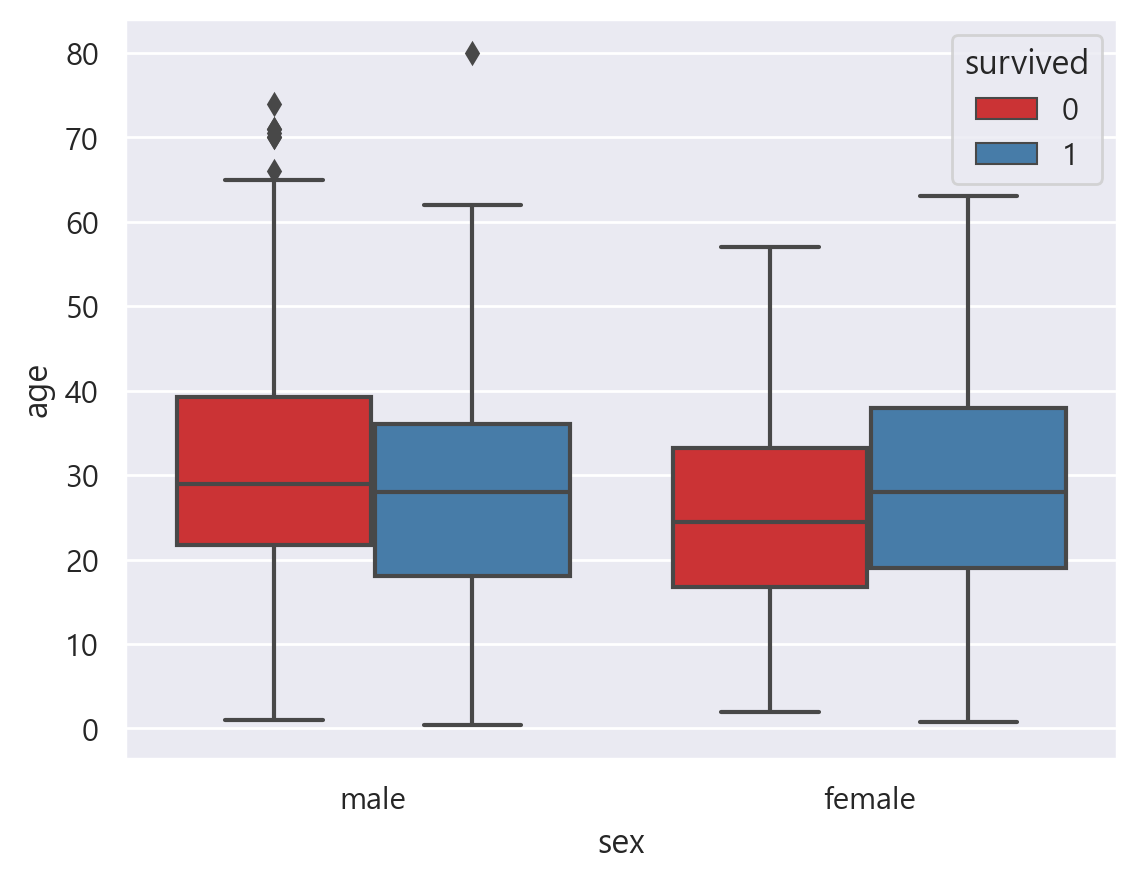

In [213]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age',hue='survived')

<Axes: xlabel='sex', ylabel='age'>

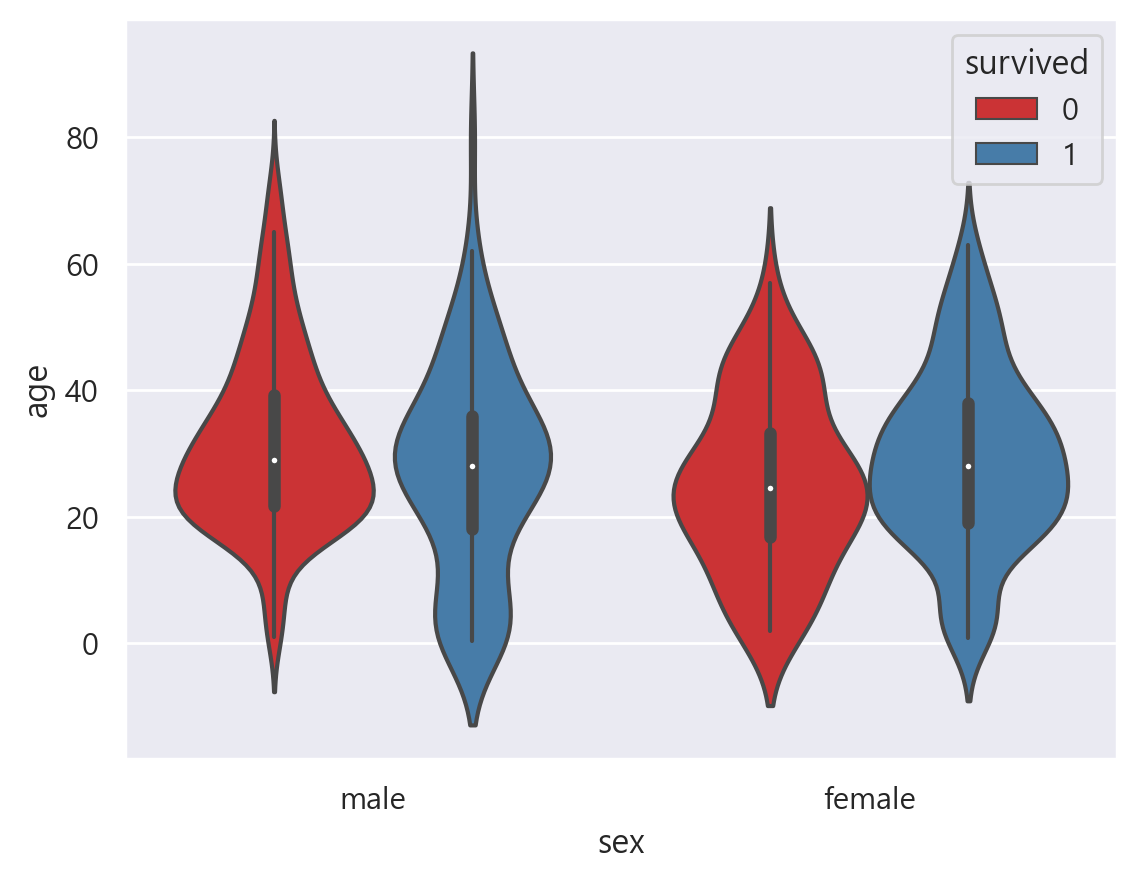

In [214]:
sns.violinplot(data=titanic, x='sex', y='age',hue='survived')

<Axes: xlabel='age', ylabel='sex'>

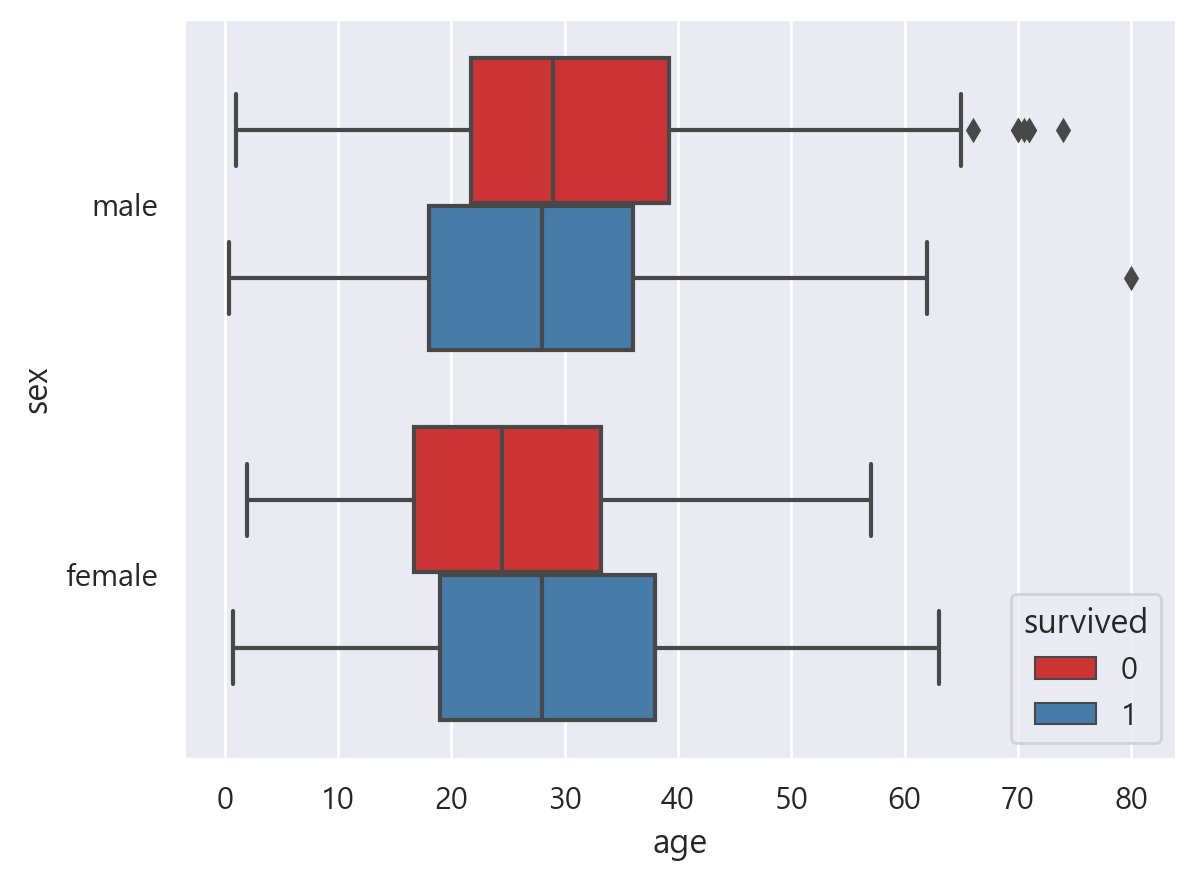

In [217]:
# boxenplot : box플롯 + 분포
sns.boxplot(data=titanic, y='sex', x='age',hue='survived', )

### 3) 쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

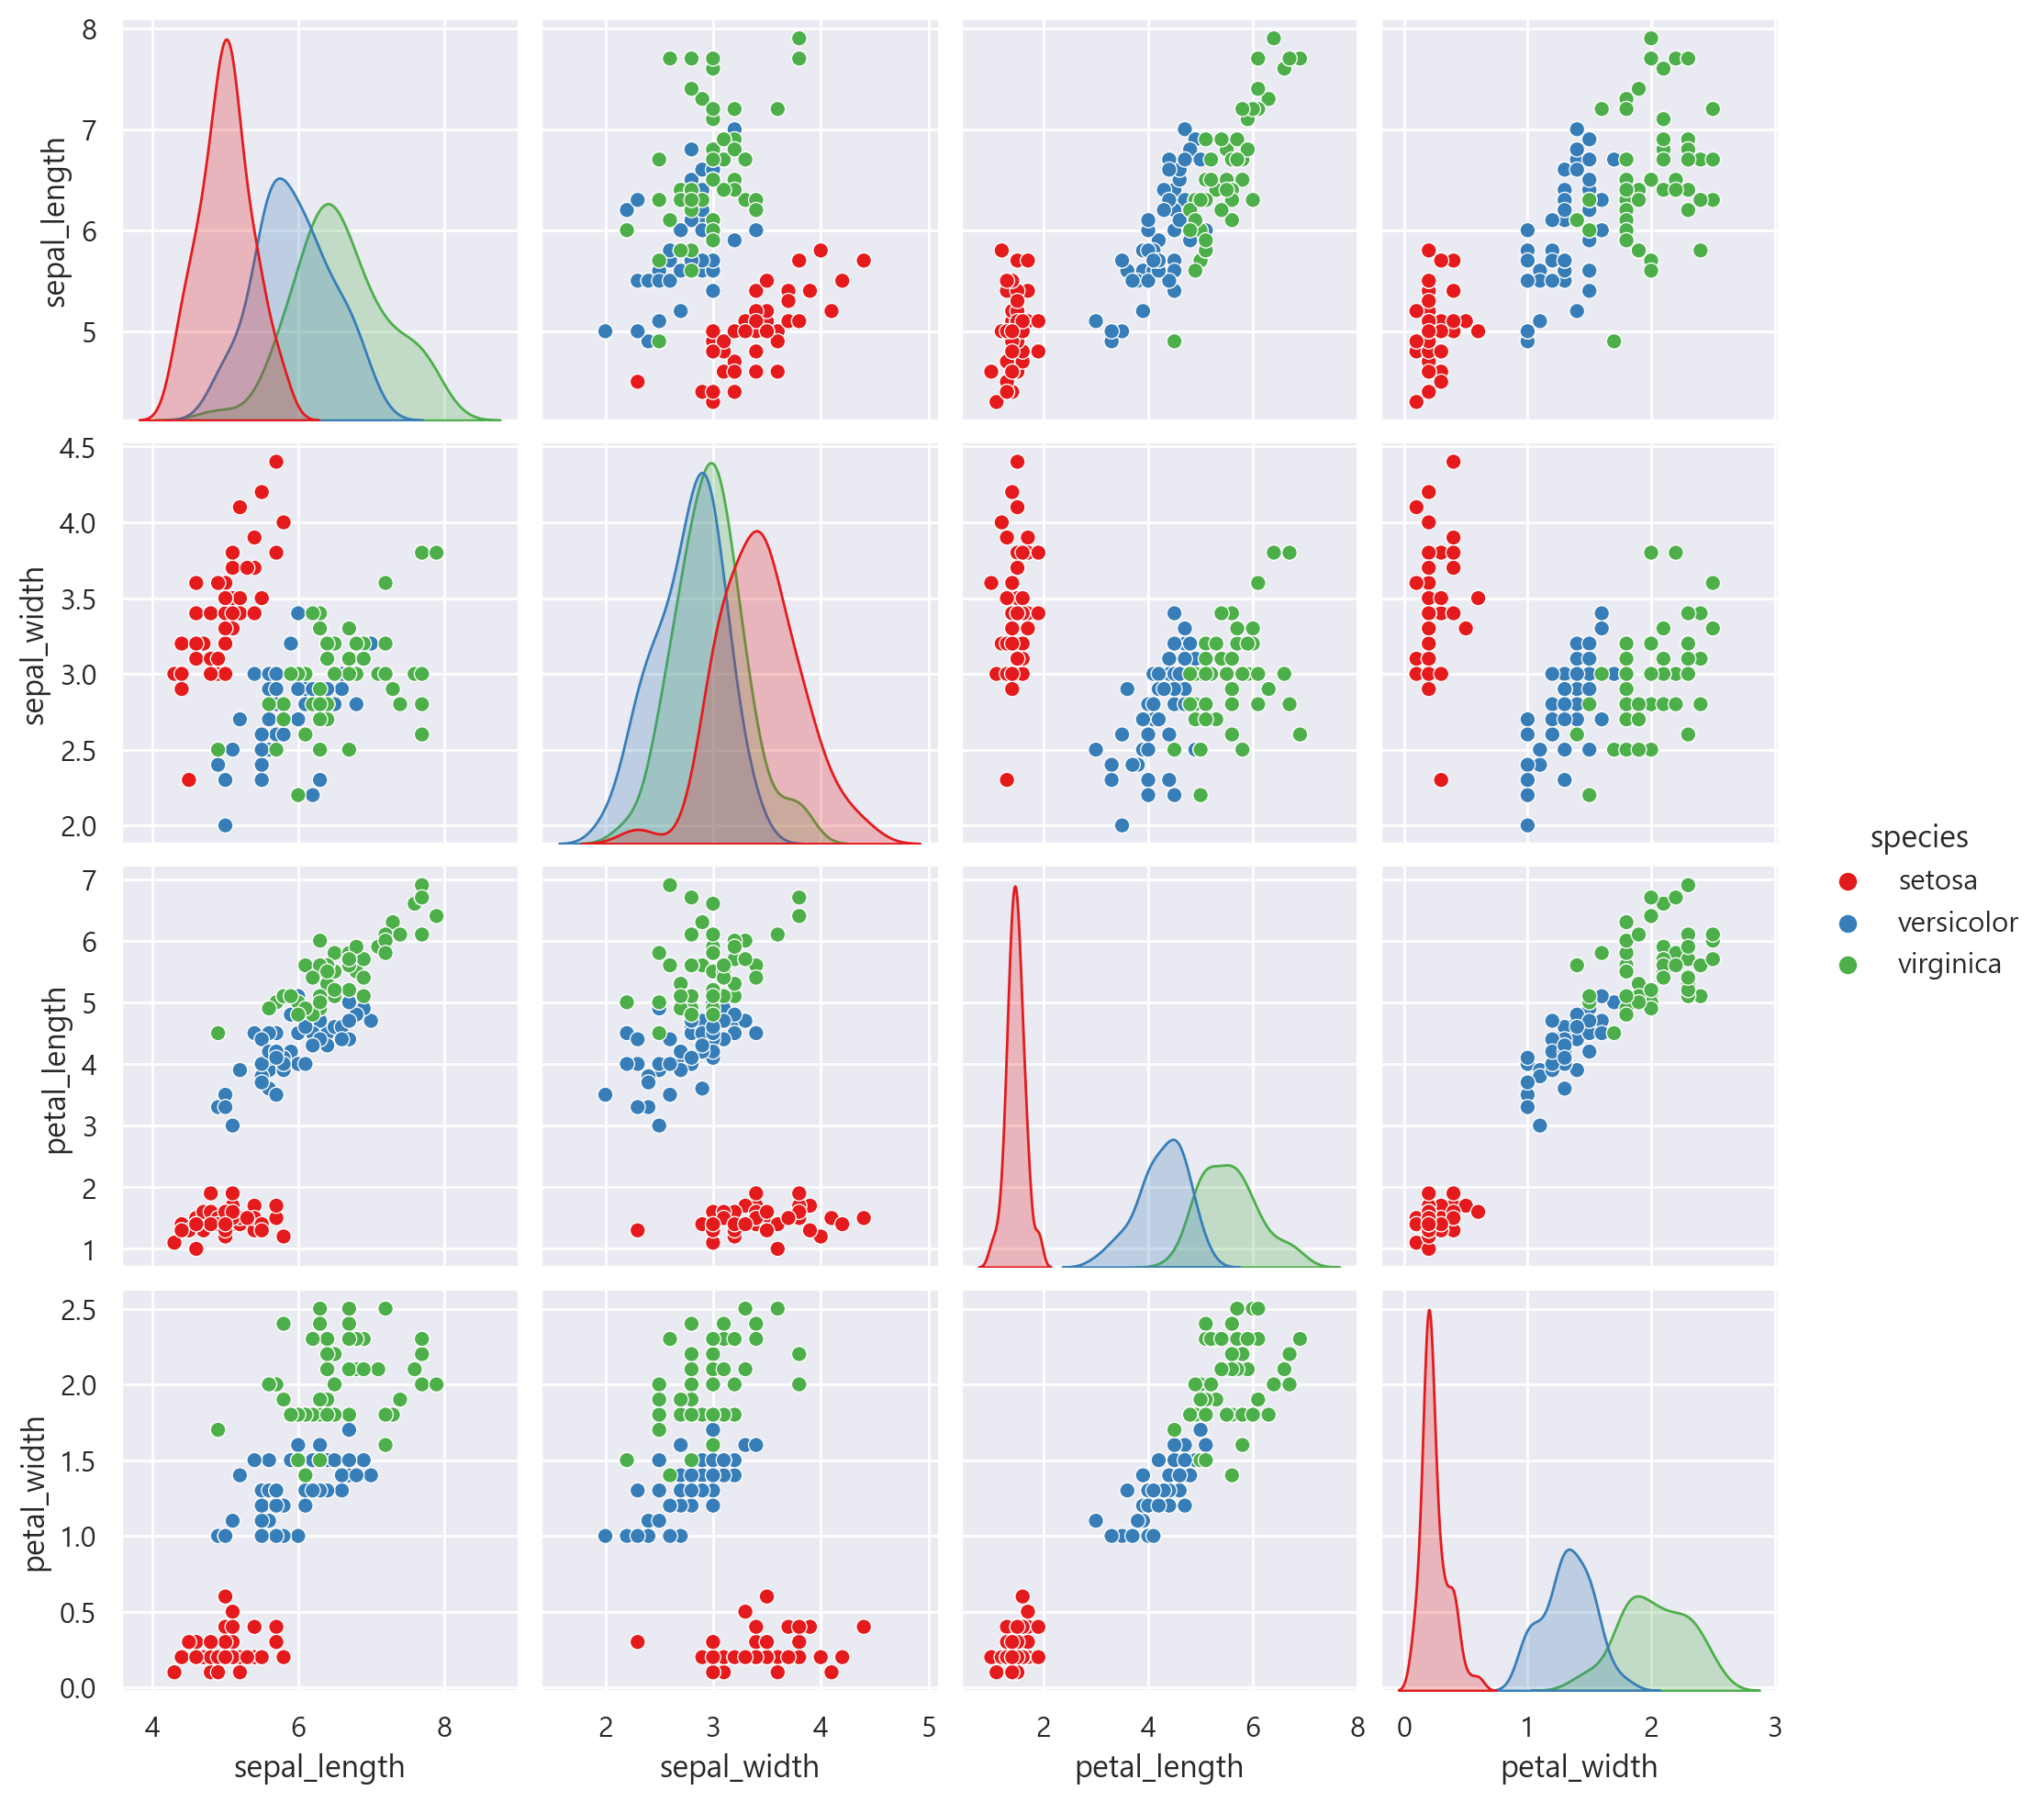

In [219]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프

In [220]:
import numpy as np
x= np.random.randn(10000) # 평균0, 표준편차1인 정규분포로 10000개 1차원 배열
x

array([ 0.62095217,  0.40040684,  0.43475613, ...,  0.12884285,
       -0.87849063, -1.22541543])

<Axes: ylabel='Count'>

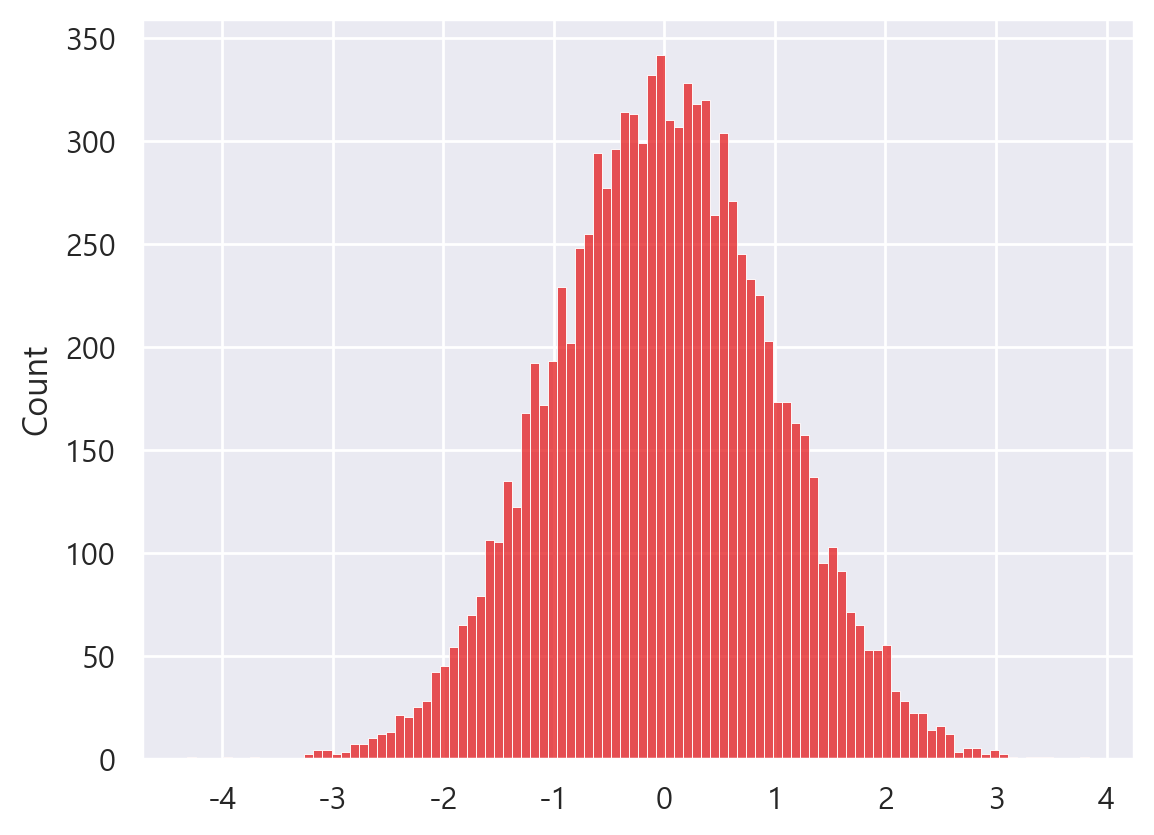

In [222]:
sns.histplot(x, bins=100)

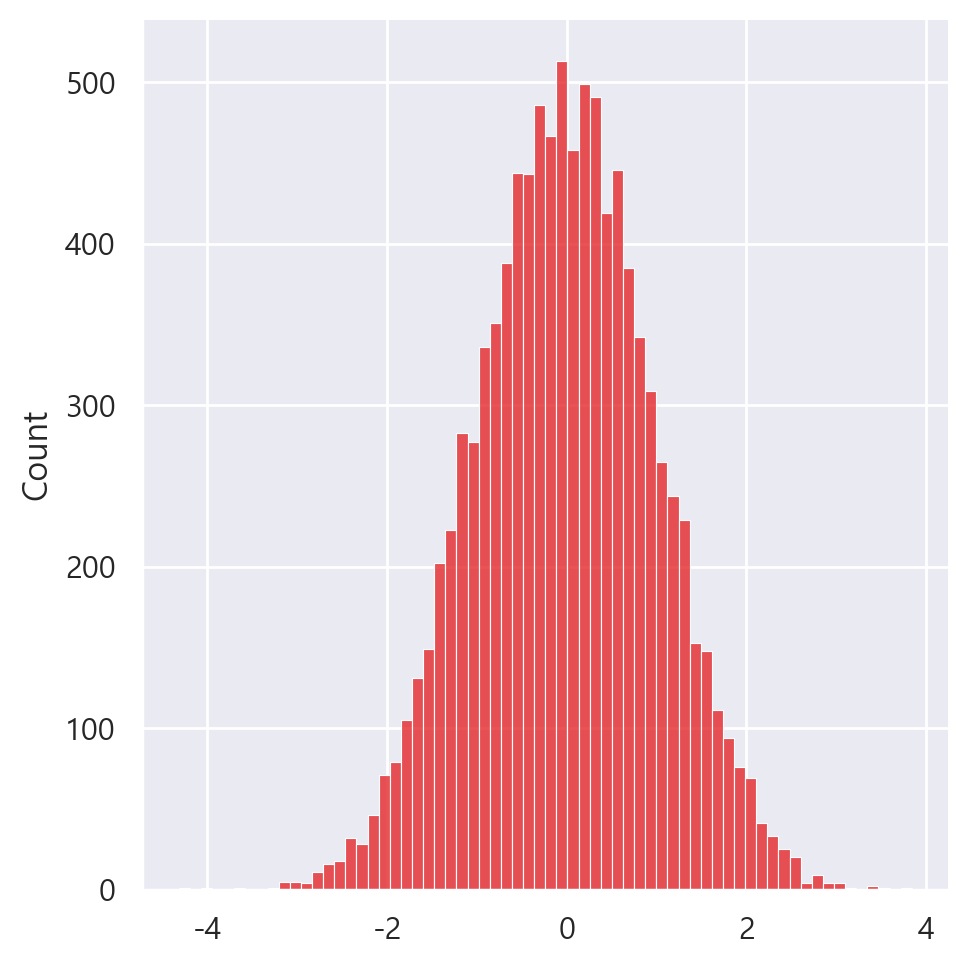

In [223]:
sns.displot(x)

### 5) 회귀그래프
- regplot(hue 사용불가)
- lmplot(hue 사용 가능)

In [225]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


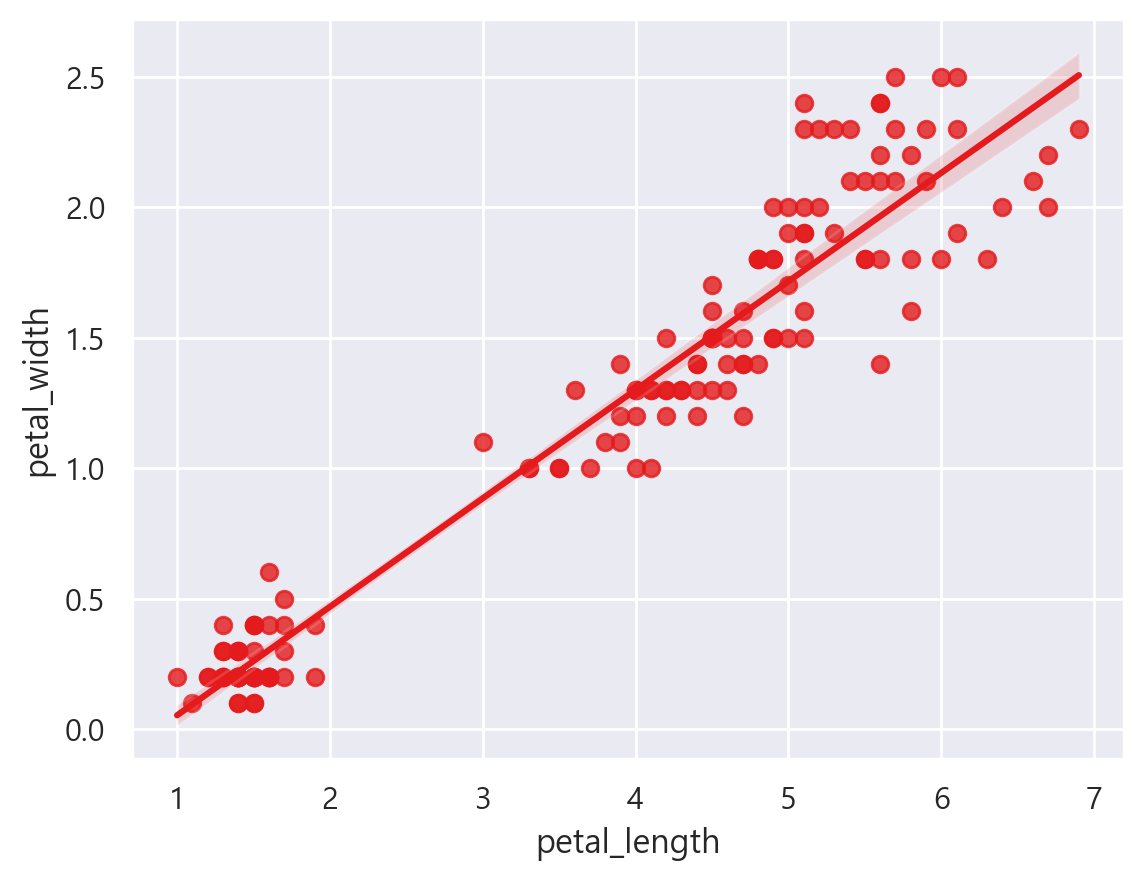

In [227]:
sns.regplot(data=iris, x='petal_length',y='petal_width')
plt.show()

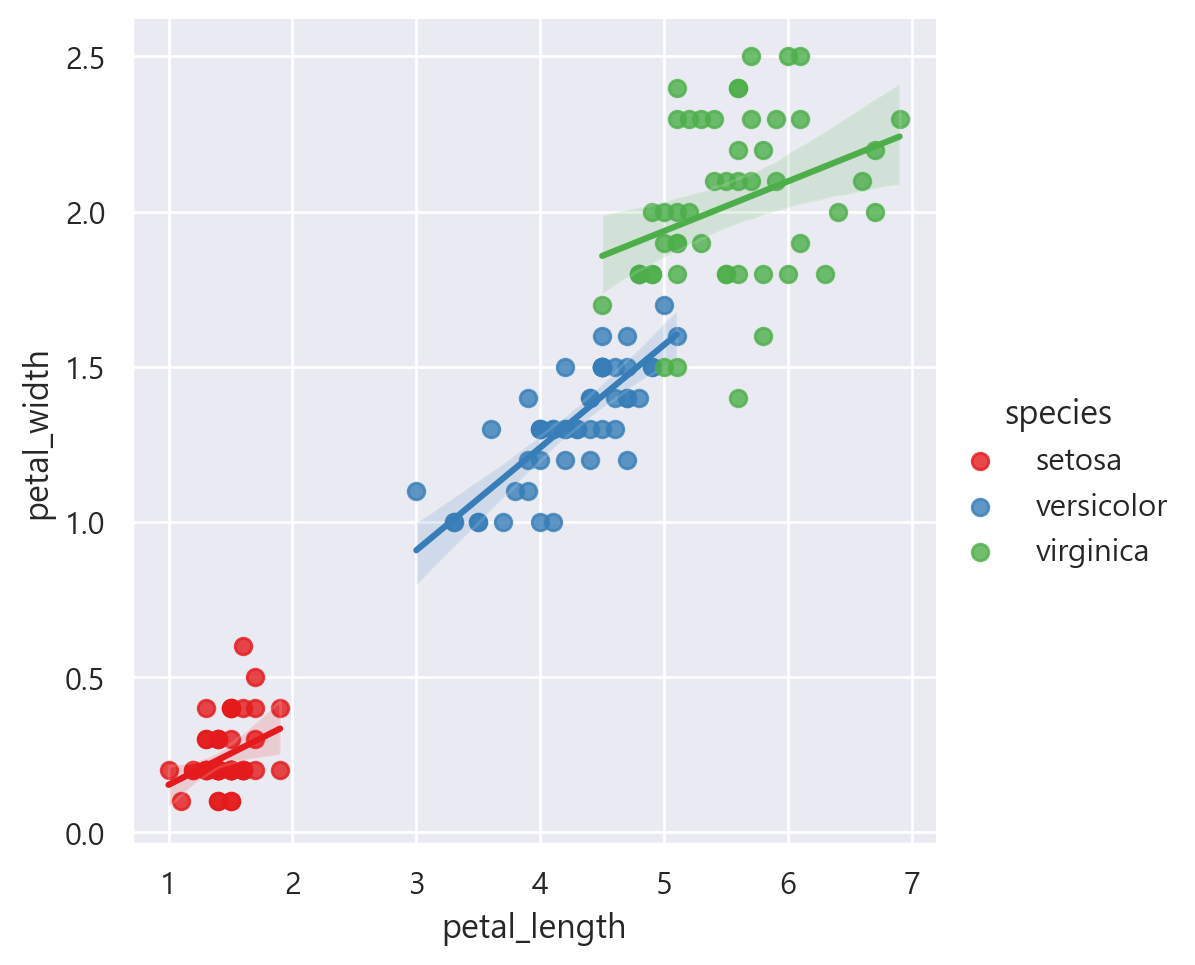

In [231]:
# 종별 회기그래프
sns.lmplot(data=iris, x='petal_length',y='petal_width',hue='species')
plt.show()

## 2.4 다중그래프를 위한 FacetGrid

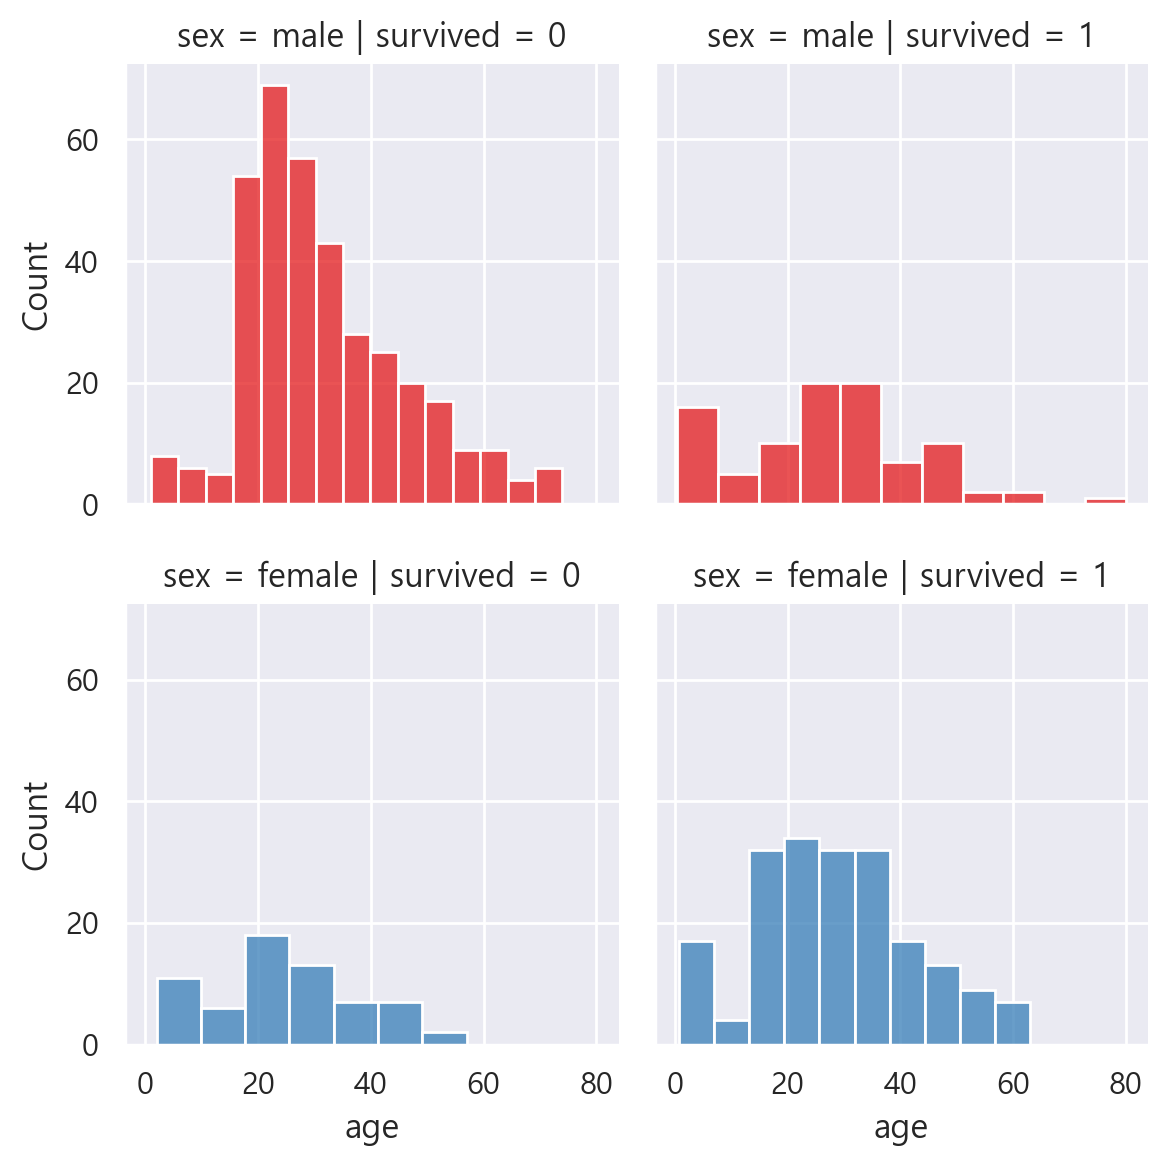

In [244]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age',)
plt.show()